# 1º Desafio de dados - Data Viking
- Contexto: Uma empresa de tecnologia, uma software house, está enfrentando uma alta rotatividade de funcionários e deseja entender os padrões que levam à saída dos colaboradores devido ao alto custo e impacto no negócio.  Utilizando técnicas de ciência de dados como análise exploratória, modelos preditivos e clusterização podemos desenvolver estratégias mais eficazes de retenção e identificar fatores críticos que contribuem para o turnover.

- Participante: Leticia da Luz
- E-mail: leticiadluz@gmail.com
----
# 1 - Análise Exploratória de Dados

In [ ]:
#Importação de bibliotecas para análise exploratória de dados
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from scipy.stats import mannwhitneyu
from scipy.stats import chi2_contingency

In [ ]:
# Montando o Google Drive no ambiente do Colab.
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Caminho do arquivo
caminho_xlsx = '/content/drive/MyDrive/projeto_rh/Base_dados - Rotatividade RH.xlsx'

In [ ]:
# Carregando o arquivo xlsx usando Pandas
df_rot_rh =  pd.read_excel(caminho_xlsx)

In [ ]:
#Visualização do Dataset
display(df_rot_rh)

,Data_Contratacao,Data_Desligamento,Meses_de_Servico,Idade,Pontuacao_Desempenho,Satisfacao_Trabalho,Nivel_Cargo,Salario,Horas_Extras,Desligamento
0,2024-02-14,NaT,3,24,2.066788,2.043644,Pleno,4994.41,15.465241,0
1,2023-11-16,2024-05-14,6,43,3.256257,1.711719,Sênior,8798.34,19.036627,1
2,2023-11-16,NaT,6,45,4.827732,3.480214,Sênior,8891.02,13.326408,0
3,2023-05-20,NaT,12,31,1.453944,1.617558,Pleno,7606.22,14.209663,0
4,2022-07-24,NaT,22,37,2.088917,2.763390,Sênior,9236.03,11.059687,0
...,...,...,...,...,...,...,...,...,...,...
645,2021-08-28,NaT,33,31,2.260088,1.539328,Pleno,7940.88,6.847854,0
646,2022-02-24,NaT,27,23,4.611915,2.521799,Junior,4893.95,4.583937,0
647,2022-10-22,NaT,19,21,4.688376,4.641638,Junior,3838.70,11.306088,0
648,2021-09-27,NaT,32,32,3.551361,3.998147,Pleno,4739.81,4.343341,0


## Dicionário de dados

- **Data_Contratacao:**
   - Tipo: Data
   - Descrição: Registra a data exata em que o funcionário foi contratado pela empresa.
- **Data_Desligamento:**
   - Tipo: Data
   - Descrição: Data em que o funcionário foi desligado da empresa.
   - Campos vazios indicam que o funcionário ainda está ativo.
- **Meses_de_Servico:**
   - Tipo: Inteiro
   - Descrição: Representa a quantidade de meses completos que o funcionário trabalhou na empresa.
- **Idade:**
   - Tipo: Inteiro
   - Descrição: Idade do funcionário no momento da contratação.
- **Pontuacao_Desempenho:**
   - Tipo: Flutuante
   - Descrição: Representa a avaliação quantitativa do desempenho do funcionário em um determinado período.
   - Opções: Métrica de 1 a 5, onde 5 indica excelência nas entregas.
- **Satisfacao_Trabalho:**
   - Tipo: Flutuante
   - Descrição: Indica o nível de satisfação do funcionário com seu trabalho.
   - Opções: Métrica de 1 a 5, onde 5 indica que o funcionário está muito feliz com o emprego.
- **Nivel_Cargo:**
   - Tipo: Texto
   - Descrição: Nível hierárquico do cargo.
- **Salario:**
   - Tipo: Flutuante
   - Descrição: Salário bruto mensal do funcionário.
- **Horas_Extras:**
  - Tipo: Flutuante
  - Descrição: Quantidade de horas extras trabalhadas pelo funcionário em um determinado período.
- **Desligamento:**
  - Tipo: Inteiro
  - Descrição: Indica se o funcionário ainda está na empresa ou se já foi desligado.
  - Opções: 0 = Funcionário ativo, 1 = Funcionário desligado

In [ ]:
#Resumo geral das variáveis
df_rot_rh.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 650 entries, 0 to 649
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Data_Contratacao      650 non-null    datetime64[ns]
 1   Data_Desligamento     144 non-null    datetime64[ns]
 2   Meses_de_Servico      650 non-null    int64         
 3   Idade                 650 non-null    int64         
 4   Pontuacao_Desempenho  650 non-null    float64       
 5   Satisfacao_Trabalho   650 non-null    float64       
 6   Nivel_Cargo           650 non-null    object        
 7   Salario               650 non-null    float64       
 8   Horas_Extras          650 non-null    float64       
 9   Desligamento          650 non-null    int64         
dtypes: datetime64[ns](2), float64(4), int64(3), object(1)
memory usage: 50.9+ KB


- Valores nulos na variável 'Data_Desligamento' estão presentes para funcionários ativos.

In [ ]:
# Valores únicos na variável target
df_rot_rh['Desligamento'].value_counts()

Desligamento
0    506
1    144
Name: count, dtype: int64

# Variável 'Data_Contratacao'

In [ ]:
#Contando os valores únicos da coluna 'Data_Contratacao'
df_rot_rh['Data_Contratacao'].value_counts().head(10)

Data_Contratacao
2023-11-16    31
2023-09-17    26
2021-08-28    25
2024-02-14    24
2021-09-27    23
2022-07-24    23
2022-06-24    23
2023-07-19    22
2023-02-19    22
2022-03-26    22
Name: count, dtype: int64

In [ ]:
# Extraindo o mês da data da contratação e desligamento
df_rot_rh['Mes_Contratacao'] = df_rot_rh['Data_Contratacao'].dt.month
df_rot_rh.head(15)


,Data_Contratacao,Data_Desligamento,Meses_de_Servico,Idade,Pontuacao_Desempenho,Satisfacao_Trabalho,Nivel_Cargo,Salario,Horas_Extras,Desligamento,Mes_Contratacao
0,2024-02-14,NaT,3,24,2.066788,2.043644,Pleno,4994.41,15.465241,0,2
1,2023-11-16,2024-05-14,6,43,3.256257,1.711719,Sênior,8798.34,19.036627,1,11
2,2023-11-16,NaT,6,45,4.827732,3.480214,Sênior,8891.02,13.326408,0,11
3,2023-05-20,NaT,12,31,1.453944,1.617558,Pleno,7606.22,14.209663,0,5
4,2022-07-24,NaT,22,37,2.088917,2.763390,Sênior,9236.03,11.059687,0,7
5,2022-05-25,2024-05-14,24,43,4.328231,3.209761,Sênior,10466.00,13.933565,1,5
6,2022-03-26,NaT,26,23,4.061082,1.911483,Pleno,5476.96,12.706278,0,3
7,2023-08-18,2024-05-14,9,30,1.086755,1.908626,Pleno,6058.88,13.626713,1,8
8,2022-02-24,NaT,27,44,1.549005,2.067783,Sênior,7780.41,2.078029,0,2
9,2022-02-24,NaT,27,44,2.042515,4.588230,Sênior,11756.99,15.148751,0,2


In [ ]:
# Contando os valores por mês
df_rot_rh['Mes_Contratacao'].value_counts().sort_index()

Mes_Contratacao
1     52
2     67
3     37
4     35
5     36
6     59
7     57
8     65
9     67
10    57
11    70
12    48
Name: count, dtype: int64

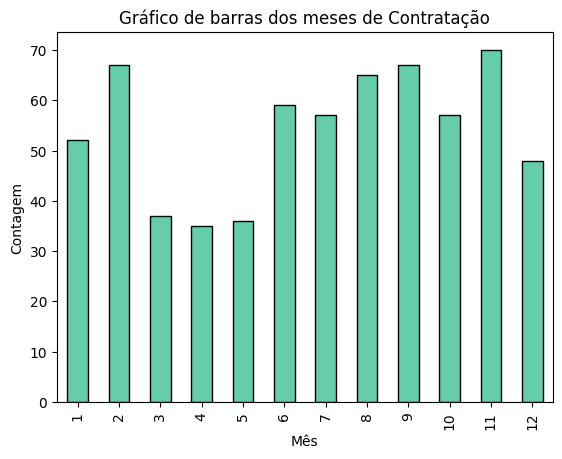

In [ ]:
#Gráfico de barras do Mês da Contratação
df_rot_rh['Mes_Contratacao'].value_counts().sort_index().plot(kind='bar', edgecolor = 'k', color = '#66CDAA')
plt.title('Gráfico de barras dos meses de Contratação')
plt.xlabel('Mês')
plt.ylabel('Contagem')
plt.show()

- O gráfico de barras representa a contagem de contratações de funcionários ao longo dos meses do ano.
- Observa-se que o mês com o maior número de contratações foi novembro, com 70 contratações, seguido de fevereiro e setembro, ambos com 67 contratações. Por outro lado, o mês de abril registrou o menor número de contratações, com apenas 35.

In [ ]:
# Contando os valores por mês da Data de Desligamento
df_rot_rh['Data_Desligamento'].value_counts().sort_index()

Data_Desligamento
2024-05-14    144
Name: count, dtype: int64

- A análise dos dados de desligamento dos funcionários revelou que todos os 144 registros apresentam a mesma data de desligamento: 14 de maio de 2024.
  - Como a data é recente e condiz com início do desafio, parece ser improvável que estes desligamentos sejam um 'lay-off'.
  - Esta uniformidade sugere fortemente que esses dados são sintéticos em vez de refletirem as datas de desligamentos reais.
- Além disso, é importante notar que a coluna 'Meses_de_Servico' provavelmente também apresentará inconsistências devido a este problema. A coluna é calculada como a diferença entre a data de início do contrato e a data de desligamento.


## Para exploração das demais variáveis, vamos dividir o dataset com base na variável 'Desligamento':
- Dividir o dataset permite identificar padrões e comportamentos específicos em subgrupos distintos (funcionários ativos/desligados).
- Facilita a comparação entre subgrupos, ajudando a entender as diferenças nas características e comportamentos de cada grupo.

In [ ]:
# Dataset para funcionários que foram desligados
df_desligados = df_rot_rh[df_rot_rh['Desligamento'] == 1]
df_desligados.shape

(144, 11)

In [ ]:
# Dataset para funcionários que ainda estão na empresa
df_ativos = df_rot_rh[df_rot_rh['Desligamento'] == 0]
df_ativos.shape

(506, 11)

# Análise Univariada (Funcionários ativos/desligados)

## Variável 'Meses_de_Servico'
- Sabemos que a coluna 'Meses de serviço' provavelmente não reflete a realidade, uma vez que depende da coluna 'Data_Desligamento', a qual identificamos como possivelmente gerada com dados sintéticos. No entanto, vamos realizar a análise sem considerar este ponto no momento.

In [ ]:
#Estatísticas da variável 'Meses_de_Servico'
pd.DataFrame({
    'Desligados': df_desligados['Meses_de_Servico'].describe(),
    'Ativos': df_ativos['Meses_de_Servico'].describe()
})

,Desligados,Ativos
count,144.000000,506.000000
mean,17.520833,19.023715
std,9.924166,9.557301
min,3.000000,3.000000
25%,8.000000,11.000000
50%,17.000000,19.000000
75%,25.250000,27.750000
max,35.000000,35.000000


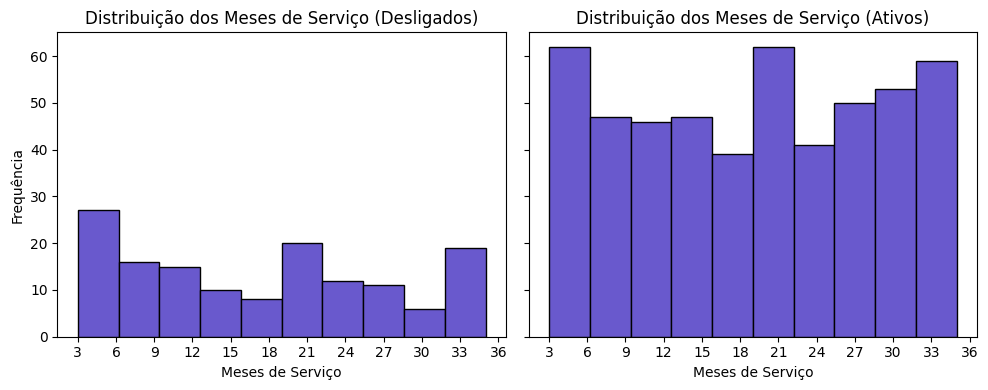

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(10, 4), sharey=True)

# Histograma para funcionários desligados
axs[0].hist(df_desligados['Meses_de_Servico'], color='#6959CD', edgecolor='k')
axs[0].set_title('Distribuição dos Meses de Serviço (Desligados)')
axs[0].set_xlabel('Meses de Serviço')
axs[0].set_ylabel('Frequência')
axs[0].xaxis.set_major_locator(ticker.MultipleLocator(3))

# Histograma para funcionários ativos
axs[1].hist(df_ativos['Meses_de_Servico'], color='#6959CD', edgecolor='k')
axs[1].set_title('Distribuição dos Meses de Serviço (Ativos)')
axs[1].set_xlabel('Meses de Serviço')
axs[1].xaxis.set_major_locator(ticker.MultipleLocator(3))


plt.tight_layout()
plt.show()

- Média e Mediana: Ambas as métricas são muito próximas entre os dois grupos, indicando que a distribuição central dos meses de serviço é similar.
- Desvio Padrão: O desvio padrão é também bastante próximo, sugerindo uma variação semelhante dentro de cada grupo.
- Faixas de Meses de Serviço: Tanto o mínimo quanto o máximo dos meses de serviço são idênticos entre os dois grupos.
- A similaridade nas médias e medianas sugere que, em média, os meses de serviço não diferem significativamente entre os funcionários desligados e ativos.
- O padrão de desligamento parece estar relacionado com o número de funcionários ativos em determinados períodos. Por exemplo, há muitos desligamentos aos 3-6 meses, o que coincide com o maior número de funcionários ativos nesse período. Este pradrão se repete nos meses 21 e 33.
- **Desta forma, quando analisamos dados de desligamentos, é importante considerar a proporção de desligamentos em relação ao número total de funcionários em cada intervalo de tempo. A alta taxa de desligamento em determinados períodos pode ser simplesmente um reflexo do número maior de funcionários nesses períodos.**

### Vamos verificar a porcentagem de desligamento por período para entender melhor nossos dados:

In [ ]:
# Definindo os intervalos de tempo de serviço
bins = list(range(0, 37, 3))
labels = [f'{i}-{i+3}' for i in bins[:-1]]
df_rot_rh['Intervalo'] = pd.cut(df_rot_rh['Meses_de_Servico'], bins=bins, labels=labels, right=False)
df_rot_rh.head()

,Data_Contratacao,Data_Desligamento,Meses_de_Servico,Idade,Pontuacao_Desempenho,Satisfacao_Trabalho,Nivel_Cargo,Salario,Horas_Extras,Desligamento,Mes_Contratacao,Intervalo
0,2024-02-14,NaT,3,24,2.066788,2.043644,Pleno,4994.41,15.465241,0,2,3-6
1,2023-11-16,2024-05-14,6,43,3.256257,1.711719,Sênior,8798.34,19.036627,1,11,6-9
2,2023-11-16,NaT,6,45,4.827732,3.480214,Sênior,8891.02,13.326408,0,11,6-9
3,2023-05-20,NaT,12,31,1.453944,1.617558,Pleno,7606.22,14.209663,0,5,12-15
4,2022-07-24,NaT,22,37,2.088917,2.763390,Sênior,9236.03,11.059687,0,7,21-24


In [ ]:
#Ajustando novamente os dfs
df_desligados = df_rot_rh[df_rot_rh['Desligamento'] == 1]
df_ativos = df_rot_rh[df_rot_rh['Desligamento'] == 0]

In [ ]:
# Contando o número total de funcionários em cada intervalo
total_funcionarios = df_rot_rh['Intervalo'].value_counts().sort_index()

# Contando o número de desligamentos em cada intervalo
desligamentos = df_desligados['Intervalo'].value_counts().sort_index()

# Calculando a taxa de desligamento relativa
porcentagem_desligamento = (desligamentos / total_funcionarios) * 100

In [ ]:
#Calculando os resultados
resultado = pd.DataFrame({
    'Total_Funcionarios': total_funcionarios,
    'Desligamentos': desligamentos,
    'Porcentagem_Desligamento (%)': porcentagem_desligamento
})
resultado

,Total_Funcionarios,Desligamentos,Porcentagem_Desligamento (%)
Intervalo,,,
0-3,0,0,NaN
3-6,58,12,20.689655
6-9,74,26,35.135135
9-12,60,15,25.000000
12-15,56,10,17.857143
15-18,51,11,21.568627
18-21,57,12,21.052632
21-24,66,15,22.727273
24-27,52,12,23.076923


- A análise das porcentagens de desligamento em diferentes intervalos de tempo de serviço revela alguns períodos críticos onde a taxa de desligamento é particularmente alta:
    - Intervalo 6-9 meses:35.14%;
    - Intervalo 9-12 meses: 25.00%;
    - Intervalo 33-36 meses: 30.91%
    
- Vamos rodar um teste de Mann-Whitney para verificar se há uma diferença estatisticamente significativa na distribuição do tempo de permanência entre funcionários ativos e desligados. O teste de Mann-Whitney é uma alternativa não-paramétrica ao teste t para amostras independentes e é adequado quando os dados não seguem uma distribuição normal.
    - H0 (Hipótese Nula) = As distribuições das duas populações são iguais.
    - HA (Hipótese Alternativa) = As distribuições das duas populações são diferentes.
    - α=0,05: Vamos utilizar o nível de significância mais comumente usado.


In [ ]:
# Realizando o teste de Mann-Whitney
estatistica_u, p_valor = mannwhitneyu(df_desligados['Meses_de_Servico'], df_ativos['Meses_de_Servico'],
                                      alternative='two-sided') #teste bicaudal
print('Estatística U:', estatistica_u)
print('P-valor:', p_valor)

Estatística U: 33143.5
P-valor: 0.09800169870492847


- **O valor de p obtido é maior que o nível de significância estabelecido a priori de 0.05. Diante desse resultado, nós falhamos em rejeitar a hipótese nula de que as distribuições das duas populações são iguais. Portanto, não há evidência suficiente para afirmar que há uma diferença significativa na distribuição dos tempos de serviço entre os funcionários ativos e os desligados. Em outras palavras, com base nos dados fornecidos, não podemos concluir que os tempos de serviço dos funcionários desligados são significativamente diferentes dos tempos de serviço dos funcionários ativos.**
    
## Variável 'Idade'  

In [ ]:
#Estatísticas da variável 'Idade'
pd.DataFrame({
    'Desligados': df_desligados['Idade'].describe(),
    'Ativos': df_ativos['Idade'].describe()
})

,Desligados,Ativos
count,144.000000,506.000000
mean,28.458333,28.318182
std,8.183964,7.974188
min,18.000000,18.000000
25%,22.000000,22.000000
50%,27.000000,27.000000
75%,33.000000,32.000000
max,49.000000,49.000000


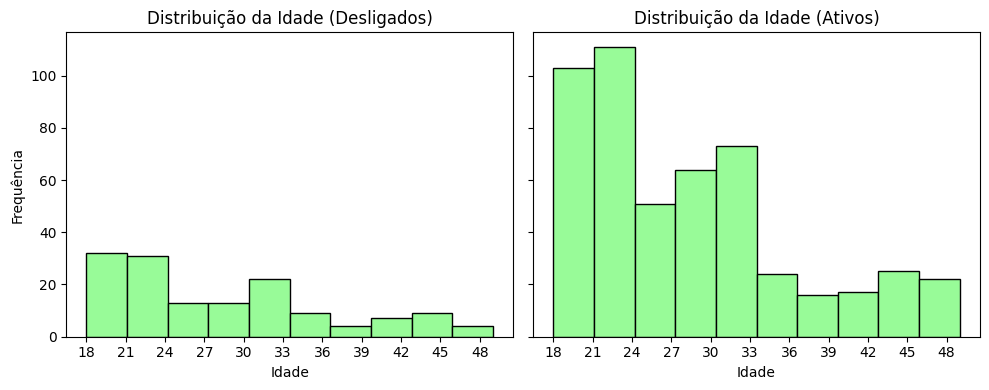

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(10, 4), sharey=True)

# Histograma para funcionários desligados
axs[0].hist(df_desligados['Idade'], color='#98FB98', edgecolor='k')
axs[0].set_title('Distribuição da Idade (Desligados)')
axs[0].set_xlabel('Idade')
axs[0].set_ylabel('Frequência')
axs[0].xaxis.set_major_locator(ticker.MultipleLocator(3))

# Histograma para funcionários ativos
axs[1].hist(df_ativos['Idade'], color='#98FB98', edgecolor='k')
axs[1].set_title('Distribuição da Idade (Ativos)')
axs[1].set_xlabel('Idade')
axs[1].xaxis.set_major_locator(ticker.MultipleLocator(3))


plt.tight_layout()
plt.show()

- Média e Mediana: Ambas as métricas são muito próximas entre os dois grupos, indicando que a distribuição central das idades é similar.
- Desvio Padrão: O desvio padrão é também bastante próximo, sugerindo uma variação semelhante dentro de cada grupo.
- Faixas de Idade: Tanto o mínimo quanto o máximo das idades são idênticos entre os dois grupos.
- A maioria dos funcionários desligados está na faixa etária de 18 a 24 anos.
- A maioria dos funcionários ativos também está na faixa etária de 18 a 24 anos.
- Poucos usuários desligados estão acima dos 36 anos.
- Mas a frequência de usuários ativos acima de 36 anos também diminui.
- Média e Mediana: A similaridade nas médias e medianas sugere que, em média, as idades não diferem significativamente entre os funcionários desligados e ativos.
- **Portanto, podemos perceber que as distribuições de idade entre os usuários desligados e ativos são bastante semelhantes, indicando que a idade por si só pode não ser um forte diferenciador para prever o desligamento de um funcionário;**

---
- Vamos rodar um teste de Mann-Whitney para verificar se há uma diferença estatisticamente significativa na distribuição da idade entre funcionários ativos e desligados.
    - H0 (Hipótese Nula) = As distribuições das duas populações são iguais.
    - HA (Hipótese Alternativa) = As distribuições das duas populações são diferentes.
    - α=0,05: Vamos utilizar o nível de significância mais comumente usado.

In [ ]:
# Realizando o teste de Mann-Whitney
estatistica_u, p_valor = mannwhitneyu(df_desligados['Idade'], df_ativos['Idade'],
                                      alternative='two-sided')
print('Estatística U:', estatistica_u)
print('P-valor:', p_valor)

Estatística U: 36442.0
P-valor: 0.9961825733953416


- **O valor de p obtido é maior que o nível de significância estabelecido a priori de 0.05. Diante desse resultado, nós falhamos em rejeitar a hipótese nula de que as distribuições das duas populações são iguais. Portanto, não há evidência suficiente para afirmar que há uma diferença significativa nas idades entre os funcionários ativos e os desligados.**
- **Desta forma, não podemos concluir que as idades dos funcionários desligados são significativamente diferentes das idades dos funcionários ativos.**

## Variável 'Pontuacao_Desempenho'

In [ ]:
#Estatísticas da variável 'Pontuacao_Desempenho'
pd.DataFrame({
    'Desligados': df_desligados['Pontuacao_Desempenho'].describe(),
    'Ativos': df_ativos['Pontuacao_Desempenho'].describe()
})

,Desligados,Ativos
count,144.000000,506.000000
mean,3.317407,2.944949
std,1.193951,1.156510
min,1.004830,1.000242
25%,2.402963,1.968936
50%,3.437308,2.916642
75%,4.485610,3.909692
max,4.992102,4.991670


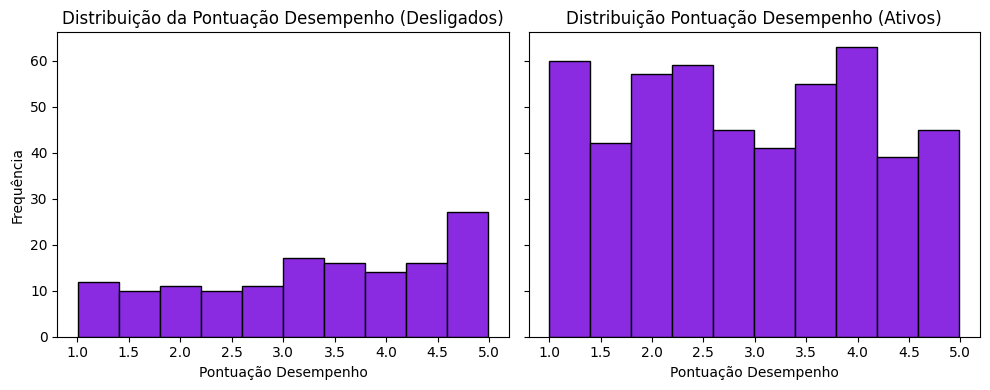

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(10, 4), sharey=True)

# Histograma para funcionários desligados
axs[0].hist(df_desligados['Pontuacao_Desempenho'], color='#8A2BE2', edgecolor='k')
axs[0].set_title('Distribuição da Pontuação Desempenho (Desligados)')
axs[0].set_xlabel('Pontuação Desempenho')
axs[0].set_ylabel('Frequência')

# Histograma para funcionários ativos
axs[1].hist(df_ativos['Pontuacao_Desempenho'], color='#8A2BE2', edgecolor='k')
axs[1].set_title('Distribuição Pontuação Desempenho (Ativos)')
axs[1].set_xlabel('Pontuação Desempenho')


plt.tight_layout()
plt.show()

- Média e Mediana: As médias e medianas são maiores para os funcionários desligados, indicando que eles tendem a ter pontuações de desempenho mais altas.
- Desvio Padrão: Os desvios padrão são semelhantes, sugerindo uma variação comparável nas pontuações dentro de cada grupo.
- Faixas de Pontuação de Desempenho: Tanto o mínimo quanto o máximo das pontuações são idênticos entre os dois grupos.
- A distribuição das pontuações de desempenho dos funcionários desligados é mais uniforme, com uma concentração significativa em torno de 4.5 e 5.
- A distribuição dos funcionários ativos é mais variável, com picos em várias faixas de pontuação, especialmente em torno de 1.0 a 2.5 e 4.0.
- Desta forma, os profissionais desligados têm uma pontuação de desempenho média mais alta (3.32) em comparação com os usuários ativos (2.94). Isso sugere que os usuários com melhor desempenho têm uma maior tendência a se desligar do serviço.
---
- Vamos rodar um teste de Mann-Whitney para verificar se há uma diferença estatisticamente significativa na distribuição da pontuação de desempenho entre funcionários ativos e desligados.
    - H0 (Hipótese Nula) = As distribuições das duas populações são iguais.
    - HA (Hipótese Alternativa) = As distribuições das duas populações são diferentes.
    - α=0,05: Vamos utilizar o nível de significância mais comumente usado.

In [ ]:
# Realizando o teste de Mann-Whitney
estatistica_u, p_valor = mannwhitneyu(df_desligados['Pontuacao_Desempenho'], df_ativos['Pontuacao_Desempenho'],
                                      alternative='two-sided')
print('Estatística U:', estatistica_u)
print('P-valor:', p_valor)

Estatística U: 43046.0
P-valor: 0.0008797434714511915


- **O valor de p obtido é menor que o nível de significância estabelecido a priori de 0.05. Diante desse resultado, rejeitamos a hipótese nula de que as distribuições das duas populações são iguais.**
- Os resultados do teste de Mann-Whitney indicam que existe uma diferença estatisticamente significativa nas pontuações de desempenho entre os usuários desligados e os usuários ativos.

## Variável 'Satisfacao_Trabalho'

In [ ]:
#Estatísticas da variável 'Pontuacao_Desempenho'
pd.DataFrame({
    'Desligados': df_desligados['Satisfacao_Trabalho'].describe(),
    'Ativos': df_ativos['Satisfacao_Trabalho'].describe()
})

,Desligados,Ativos
count,144.000000,506.000000
mean,2.885305,2.956306
std,1.142496,1.150861
min,1.002868,1.015440
25%,1.902800,1.975363
50%,2.822590,2.958437
75%,3.859398,3.983859
max,4.949533,4.999415


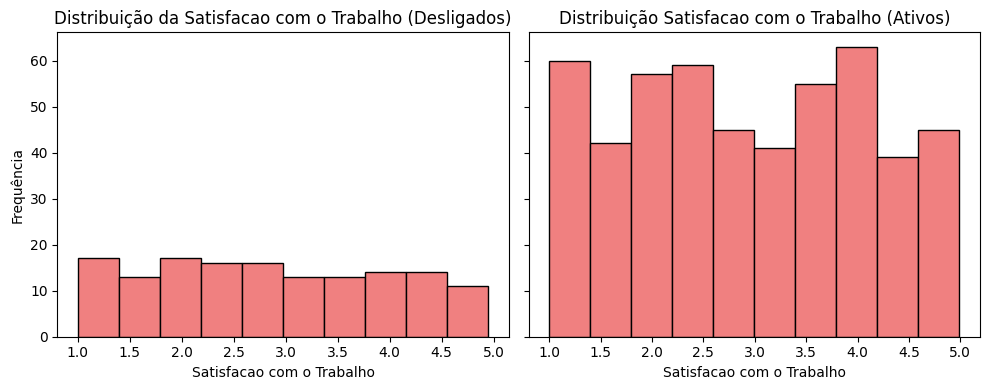

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(10, 4), sharey=True)

# Histograma para funcionários desligados
axs[0].hist(df_desligados['Satisfacao_Trabalho'], color='#F08080', edgecolor='k')
axs[0].set_title('Distribuição da Satisfacao com o Trabalho (Desligados)')
axs[0].set_xlabel('Satisfacao com o Trabalho')
axs[0].set_ylabel('Frequência')

# Histograma para funcionários ativos
axs[1].hist(df_ativos['Pontuacao_Desempenho'], color='#F08080', edgecolor='k')
axs[1].set_title('Distribuição Satisfacao com o Trabalho (Ativos)')
axs[1].set_xlabel('Satisfacao com o Trabalho')


plt.tight_layout()
plt.show()

- Média e Mediana: As médias e medianas são muito próximas entre os dois grupos, indicando que a distribuição central da satisfação com o trabalho é similar.
- Desvio Padrão: O desvio padrão é também bastante próximo, sugerindo uma variação semelhante dentro de cada grupo.
- Faixas de Satisfação com o Trabalho: Tanto o mínimo quanto o máximo das pontuações são quase idênticos entre os dois grupos.
- A distribuição da satisfação com o trabalho dos funcionários desligados é mais uniforme, com frequências similares em todas as pontuações.
- A distribuição dos funcionários ativos é mais variável, com picos em várias pontuações, especialmente em torno de 1.0, 2.0 e 4.0.
- Os dados indicam que não há uma diferença significativa na satisfação com o trabalho entre os funcionários desligados e os ativos. As médias de satisfação são muito próximas (2.89 para desligados e 2.96 para ativos), e os desvios padrão são praticamente iguais, indicando que a variação dentro de cada grupo é semelhante.
- Portanto, parece que a satisfação com o trabalho não influencia significativamente o desligamento dos funcionários.
---
- Vamos realizar um teste de Mann-Whitney para verificar se há uma diferença estatisticamente significativa na distribuição da satisfação com o trabalho entre funcionários ativos e desligados.
    - H0 (Hipótese Nula) = As distribuições das duas populações são iguais.
    - HA (Hipótese Alternativa) = As distribuições das duas populações são diferentes.
    - α=0,05: Vamos utilizar o nível de significância mais comumente usado.

In [ ]:
# Realizando o teste de Mann-Whitney
estatistica_u, p_valor = mannwhitneyu(df_desligados['Satisfacao_Trabalho'], df_ativos['Satisfacao_Trabalho'],
                                      alternative='two-sided')
print('Estatística U:', estatistica_u)
print('P-valor:', p_valor)

Estatística U: 35132.0
P-valor: 0.5133619167368606


**O p-valor obtido é muito que o nível de significância utilizado (0.05). Isso significa que falhamos em rejeitar a hipótese nula e, portanto, concluímos que não há uma diferença significativa na satisfação com o trabalho entre os funcionários desligados e os ativos.**

## Variável 'Nivel_Cargo'

In [ ]:
#Tabala de contigência nivel cargo / desligamento
tab_cont_cargo = pd.crosstab(df_rot_rh['Nivel_Cargo'],df_rot_rh['Desligamento'])
tab_cont_cargo

Desligamento,0,1
Nivel_Cargo,,
Junior,177,56
Pleno,180,45
Sênior,149,43


In [ ]:
pd.crosstab(df_rot_rh['Nivel_Cargo'],df_rot_rh['Desligamento'], normalize= 'index')*100

Desligamento,0,1
Nivel_Cargo,,
Junior,75.965665,24.034335
Pleno,80.000000,20.000000
Sênior,77.604167,22.395833


- **As tabelas de contingência e distribuição percentual indicam que as frequências de desligamento entre os diferentes níveis de cargo (Júnior, Pleno e Sênior) têm uma distribuição uniforme. As porcentagens de desligamento são bastante semelhantes entre os níveis, sugerindo que o nível de cargo não é um fator determinante significativo para o desligamento dos funcionários.**
- Embora haja pequenas variações nas porcentagens, elas não são significativas o suficiente para indicar que o nível de cargo seja um fator determinante para o desligamento dos funcionários.
- A análise sugere que o nível de cargo por si só pode não ser um fator determinante para o desligamento dos funcionários, uma vez que as distribuições e porcentagens são bastante semelhantes entre os diferentes níveis.
---
- Para verificar estas suposições vamos realizar um teste de qui-quadrado:
  - O teste de qui-quadrado é uma técnica estatística utilizada para testar a independência entre duas variáveis categóricas ou para verificar a adequação de uma distribuição observada em relação a uma distribuição esperada.
  Existem alguns pressupostos que devem ser atendidos para que os resultados do teste de qui-quadrado sejam válidos:
  - Dados Categóricos: O teste de qui-quadrado é adequado para variáveis categóricas (nominais ou ordinais). Os dados devem ser organizados em uma tabela de contingência, onde as frequências observadas são comparadas com as frequências esperadas.
  - Tamanho da Amostra: Geralmente, recomenda-se que cada célula da tabela de contingência tenha uma frequência esperada de pelo menos 5 para garantir a validade do teste.
  - As observações devem ser independentes umas das outras. Ou seja cada observação deve ser coletada de forma independente.
---
  - H0 (Hipótese Nula) = Não há diferença significativa entre as frequências observadas e esperadas, o que, por sua vez, sugere que as variáveis são independentes.
  - HA (Hipótese Alternativa) = Há diferença significativa entre as frequências observadas e esperadas,ou seja, as variáveis não são independentes, há associação.
  - α=0,05: Vamos utilizar o nível de significância mais comumente usado

In [ ]:
# Teste de qui-quadrado
chi2, p_valor, graus_liberdade, frequencias_esperadas = chi2_contingency(tab_cont_cargo)
print(f'Chi-quadrado: {chi2}')
print(f'P-valor: {p_valor:.5f}')
print(f'Frequências esperadas: \n{frequencias_esperadas}')


Chi-quadrado: 1.0895178137838704
P-valor: 0.57998
Frequências esperadas: 
[[181.38153846  51.61846154]
 [175.15384615  49.84615385]
 [149.46461538  42.53538462]]


- O p-valor obtido (0.57998) é maior que o nível de significância utilizado (0.05). Isso significa que falhamos em rejeitar a hipótese nula e, portanto, concluímos que não há uma associação significativa entre o nível de cargo e o desligamento dos funcionários.
- As frequências observadas de desligamento em cada nível de cargo (Júnior, Pleno, Sênior) estão de acordo com as frequências esperadas, sugerindo que o desligamento é distribuído uniformemente entre os diferentes níveis de cargo.

## Variável 'Salario'

In [ ]:
#Estatísticas da variável 'Salário'
pd.DataFrame({
    'Desligados': df_desligados['Salario'].describe(),
    'Ativos': df_ativos['Salario'].describe()
})

,Desligados,Ativos
count,144.000000,506.000000
mean,6098.758333,6140.929625
std,2751.345724,2673.784041
min,2013.190000,2004.500000
25%,3818.067500,4093.440000
50%,5547.050000,5567.765000
75%,7462.070000,7840.640000
max,11932.740000,11957.290000


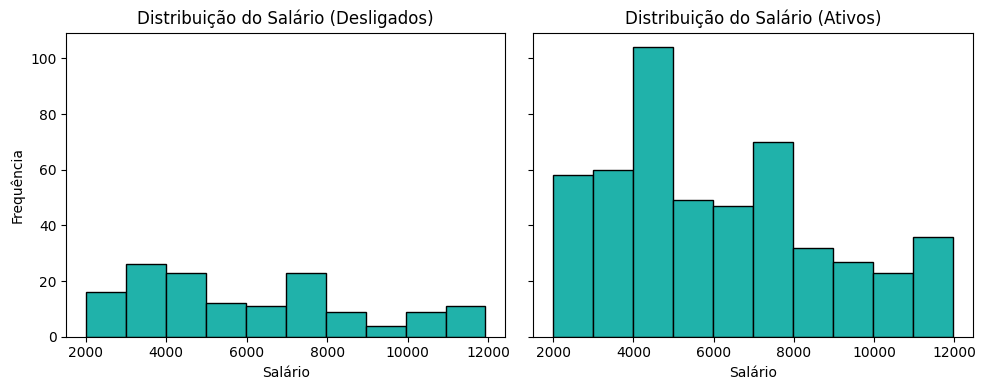

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(10, 4), sharey=True)

# Histograma para funcionários desligados
axs[0].hist(df_desligados['Salario'], color='#20B2AA', edgecolor='k')
axs[0].set_title('Distribuição do Salário (Desligados)')
axs[0].set_xlabel('Salário')
axs[0].set_ylabel('Frequência')

# Histograma para funcionários ativos
axs[1].hist(df_ativos['Salario'], color='#20B2AA', edgecolor='k')
axs[1].set_title('Distribuição do Salário (Ativos)')
axs[1].set_xlabel('Salário')


plt.tight_layout()
plt.show()

- Média e Mediana: Ambas as métricas são muito próximas entre os dois grupos, indicando que a distribuição central dos salários é similar.
- Desvio Padrão: O desvio padrão é também bastante próximo, sugerindo uma variação semelhante dentro de cada grupo.
- Faixas de Salário: Tanto o mínimo quanto o máximo dos salários são quase idênticos entre os dois grupos.
- Distribuição: A distribuição dos salários dos funcionários desligados é mais dispersa (com picos em torno de 4000 e 8000) há também menor concentração de salários nas faixas mais altas (acima de 8000), enquanto a distribuição dos salários dos funcionários ativos é mais concentrada na faixa de 4000 a 6000, a dispersão é menor em comparação com os funcionários desligados, com picos bem definidos.
- **A análise sugere que o salário por si só pode não ser um fator determinante para o desligamento dos funcionários, uma vez que as distribuições e medidas centrais são bastante semelhantes entre os dois grupos.**
---
- Vamos realizar um teste de Mann-Whitney para verificar se há uma diferença estatisticamente significativa na distribuição do salário entre funcionários ativos e desligados.
    - H0 (Hipótese Nula) = As distribuições das duas populações são iguais.
    - HA (Hipótese Alternativa) = As distribuições das duas populações são diferentes.
    - α=0,05: Vamos utilizar o nível de significância mais comumente usado.

In [ ]:
# Realizando o teste de Mann-Whitney
estatistica_u, p_valor = mannwhitneyu(df_desligados['Salario'], df_ativos['Salario'],
                                      alternative='two-sided')
print('Estatística U:', estatistica_u)
print('P-valor:', p_valor)

Estatística U: 35660.0
P-valor: 0.6979844101291811


- O p-valor obtido é  maior que o nível de significância utilizado (0.05). Isso significa que falhamos em rejeitar a hipótese nula e, portanto, concluímos que não há uma diferença significativa entre os salários dos funcionários desligados e dos funcionários ativos.
- Desta forma, os resultados do teste de Mann-Whitney indicam que não há uma diferença estatisticamente significativa nos salários entre os funcionários desligados e os funcionários ativos. As análises anteriores também mostraram que as médias de salário e as distribuições das faixas salariais são muito semelhantes entre os dois grupos.

## Variável 'Horas_Extras'

In [ ]:
#Estatísticas da variável 'Horas Extras'
pd.DataFrame({
    'Desligados': df_desligados['Horas_Extras'].describe(),
    'Ativos': df_ativos['Horas_Extras'].describe()
})

,Desligados,Ativos
count,144.000000,506.000000
mean,12.328143,9.464444
std,7.723578,5.600606
min,0.055160,0.003734
25%,6.222500,4.782672
50%,11.418475,8.857661
75%,17.832469,14.221540
max,41.638350,19.984160


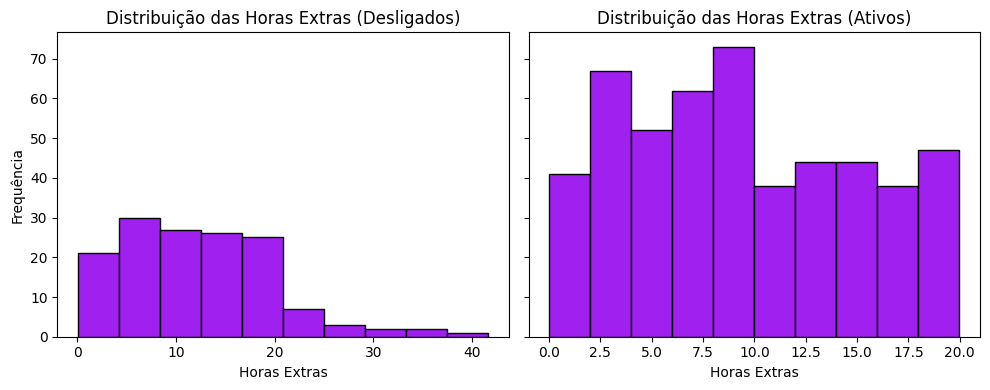

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(10, 4), sharey=True)

# Histograma para funcionários desligados
axs[0].hist(df_desligados['Horas_Extras'], color='#A020F0', edgecolor='k')
axs[0].set_title('Distribuição das Horas Extras (Desligados)')
axs[0].set_xlabel('Horas Extras')
axs[0].set_ylabel('Frequência')

# Histograma para funcionários ativos
axs[1].hist(df_ativos['Horas_Extras'], color='#A020F0', edgecolor='k')
axs[1].set_title('Distribuição das Horas Extras (Ativos)')
axs[1].set_xlabel('Horas Extras')


plt.tight_layout()
plt.show()

- Média e Mediana: As médias e medianas são maiores para os funcionários desligados, indicando que eles tendem a realizar mais horas extras.
- Desvio Padrão: O desvio padrão é maior para os funcionários desligados, sugerindo uma variação maior nas horas extras dentro deste grupo.
- Faixas de Horas Extras: Tanto o mínimo quanto o máximo das horas extras são maiores para os funcionários desligados.
- A distribuição das horas extras dos funcionários desligados é mais dispersa, com uma concentração significativa em torno de 0 a 20 horas e alguns casos extremos acima de 20 horas.
- A distribuição dos funcionários ativos é mais concentrada em torno de 0 a 10 horas, com picos bem definidos e menor dispersão.
---
- Vamos realizar um teste de Mann-Whitney para verificar se há uma diferença estatisticamente significativa na distribuição de horas extras entre funcionários ativos e desligados.
    - H0 (Hipótese Nula) = As distribuições das duas populações são iguais.
    - HA (Hipótese Alternativa) = As distribuições das duas populações são diferentes.
    - α=0,05: Vamos utilizar o nível de significância mais comumente usado.

In [ ]:
# Realizando o teste de Mann-Whitney
estatistica_u, p_valor = mannwhitneyu(df_desligados['Horas_Extras'], df_ativos['Horas_Extras'],
                                      alternative='two-sided')
print('Estatística U:', estatistica_u)
print('P-valor:', p_valor)

Estatística U: 43867.5
P-valor: 0.00018417131461254018


- O p-valor obtido é muito menor que o nível de significância utilizado (0.05). Isso significa que podemos rejeitar a hipótese nula com um alto grau de confiança e concluir que há uma diferença significativa entre as horas extras dos funcionários desligados e dos funcionários ativos.
- Portanto, os resultados do teste de Mann-Whitney indicam que existe uma diferença estatisticamente significativa nas horas extras entre os funcionários desligados e os funcionários ativos. Análises anteriores mostraram que os funcionários desligados tendem a realizar mais horas extras do que os funcionários ativos.
---
## Conclusões
- A análise das variáveis relacionadas à taxa de desligamento dos funcionários revelou algumas descobertas importantes:
  - **Data de Contratação:** O mês de novembro registrou o maior número de contratações, com 70 novos funcionários. Os meses de fevereiro e setembro também tiveram alta demanda, ambos com 67 contratações. Por outro lado, o mês de abril teve o menor número de contratações, com apenas 35
  -	**Data de Desligamento:** Todos os 144 registros de desligamento de funcionários têm a mesma data: 14 de maio de 2024. A uniformidade sugere que esses dados podem ser sintéticos, em vez de refletirem datas reais de desligamento, e a coluna 'Meses_de_Servico' também pode estar inconsistente devido a esse problema
  - **Meses de Serviço:** A análise sugere que os meses de serviço por si só podem não ser um fator determinante para o desligamento dos funcionários, uma vez que as distribuições e medidas centrais são bastante semelhantes entre os funcionários desligados e ativos.
  - **Idade:** A idade também parece não ser um fator significativo para o desligamento, com distribuições semelhantes entre os funcionários desligados e ativos.
  - **Pontuação de Desempenho:** Funcionários desligados tendem a ter pontuações de desempenho mais altas em comparação com os funcionários ativos. A análise indicou que há uma diferença significativa entre os dois grupos, sugerindo que funcionários de alto desempenho podem estar mais propensos a se desligar.
  - **Satisfação com o Trabalho:** A satisfação com o trabalho não mostrou uma diferença significativa entre os funcionários desligados e ativos, sugerindo que essa variável pode não ser um fator crítico para o desligamento.
  - **Nível de Cargo:** A distribuição de desligamento entre os diferentes níveis de cargo (Júnior, Pleno, Sênior) é bastante uniforme, indicando que o nível de cargo pode não influenciar significativamente a taxa de desligamento.
  - **Salário:** Os resultados indicam que não há uma diferença significativa nos salários entre os funcionários desligados e ativos, sugerindo que o salário pode não ser um fator determinante para o desligamento.
  - **Horas Extras:** A análise revelou que os funcionários desligados tendem a realizar mais horas extras do que os funcionários ativos. Esta variável mostrou uma diferença significativa entre os dois grupos, indicando que a carga de trabalho adicional pode estar associada ao desligamento.

- Entre as variáveis analisadas, Pontuação de Desempenho e Horas Extras mostraram uma relação significativa com a taxa de desligamento. Funcionários com pontuações de desempenho mais altas e aqueles que realizam mais horas extras tendem a ter uma maior probabilidade de se desligarem da empresa.


# 2 - Aprendizado de máquina supervisionado (Classificação)
- Para modelagem, vamos remover as seguintes colunas:
  - **Data_Contratacao:** Manter apenas o mês de contratação parece mais assertivo para indicar as variações ao longo dos meses ao modelo.
  - **Data_Desligamento:** Esta coluna apresenta muitos valores NA e a data única sugere fortemente que são dados sintéticos. Além disto, mantê-la poderia gerar vazamento de dados para o modelo, já que a simples presença de um valor nesta coluna indicaria que o funcionário foi desligado. Isso poderia afetar negativamente a capacidade do modelo de aprender padrões genuínos, uma vez que ele estaria usando informações que não estariam disponíveis no momento da previsão.
  - **Meses_de_Servico:** Esta coluna depende da coluna 'Data_Desligamento', portanto, não refletirá a realidade de maneira precisa.
  - **Intervalo:** Coluna criada apenas para a realização de análise exploratória, sem utilidade para a modelagem.


In [ ]:
# Visualizando o Dataset integral
df_rot_rh.head()

,Data_Contratacao,Data_Desligamento,Meses_de_Servico,Idade,Pontuacao_Desempenho,Satisfacao_Trabalho,Nivel_Cargo,Salario,Horas_Extras,Desligamento,Mes_Contratacao,Intervalo
0,2024-02-14,NaT,3,24,2.066788,2.043644,Pleno,4994.41,15.465241,0,2,3-6
1,2023-11-16,2024-05-14,6,43,3.256257,1.711719,Sênior,8798.34,19.036627,1,11,6-9
2,2023-11-16,NaT,6,45,4.827732,3.480214,Sênior,8891.02,13.326408,0,11,6-9
3,2023-05-20,NaT,12,31,1.453944,1.617558,Pleno,7606.22,14.209663,0,5,12-15
4,2022-07-24,NaT,22,37,2.088917,2.763390,Sênior,9236.03,11.059687,0,7,21-24


In [ ]:
# Resumo geral das variáveis
df_rot_rh.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 650 entries, 0 to 649
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Data_Contratacao      650 non-null    datetime64[ns]
 1   Data_Desligamento     144 non-null    datetime64[ns]
 2   Meses_de_Servico      650 non-null    int64         
 3   Idade                 650 non-null    int64         
 4   Pontuacao_Desempenho  650 non-null    float64       
 5   Satisfacao_Trabalho   650 non-null    float64       
 6   Nivel_Cargo           650 non-null    object        
 7   Salario               650 non-null    float64       
 8   Horas_Extras          650 non-null    float64       
 9   Desligamento          650 non-null    int64         
 10  Mes_Contratacao       650 non-null    int32         
 11  Intervalo             650 non-null    category      
dtypes: category(1), datetime64[ns](2), float64(4), int32(1), int64(3), object(1)
m

In [ ]:
#Removendo colunas que não serão usadas no modelo:
df_rot_ml = df_rot_rh.drop(columns=['Data_Contratacao', 'Data_Desligamento', 'Meses_de_Servico', 'Intervalo'])

In [ ]:
df_rot_ml.head()

,Idade,Pontuacao_Desempenho,Satisfacao_Trabalho,Nivel_Cargo,Salario,Horas_Extras,Desligamento,Mes_Contratacao
0,24,2.066788,2.043644,Pleno,4994.41,15.465241,0,2
1,43,3.256257,1.711719,Sênior,8798.34,19.036627,1,11
2,45,4.827732,3.480214,Sênior,8891.02,13.326408,0,11
3,31,1.453944,1.617558,Pleno,7606.22,14.209663,0,5
4,37,2.088917,2.763390,Sênior,9236.03,11.059687,0,7


- **Realizamos um teste inicial com o dataset utilizando os modelos SVC, KNN e Xgboost. O recall resultante foi de aproximadamente 0,55. Mesmo alterando o estimador e melhorando os hiperparâmetros, essas mudanças não surtiram efeito significativo em nossa métrica de desempenho.** Dessa forma, optamos por realizar feature engineering, criando novas variáveis a partir daquelas que se mostraram mais relacionadas ao target, como: 'Pontuacao_Desempenho' e 'Horas_Extras'

- Vamos criar uma nova coluna categórica com base na coluna:'Pontuacao_Desempenho':
- Intervalos:
  - Ruim = 1.0 - 1.9;
  - Médio = 2.0 - 2.9;
  - Bom = 3.0 - 3.9;
  - Excelente = 4.0 - 5.0;


In [ ]:
# Definindo os bins e os labels
bins = [0, 1.9, 2.9, 3.9, 5]
labels = ['Ruim', 'Médio', 'Bom', 'Excelente']

In [ ]:
# Criando a nova coluna categórica
df_rot_ml['Desempenho_Categoria'] = pd.cut(df_rot_ml['Pontuacao_Desempenho'], bins=bins, labels=labels, include_lowest=True)

In [ ]:
df_rot_ml.head(10)

,Idade,Pontuacao_Desempenho,Satisfacao_Trabalho,Nivel_Cargo,Salario,Horas_Extras,Desligamento,Mes_Contratacao,Desempenho_Categoria
0,24,2.066788,2.043644,Pleno,4994.41,15.465241,0,2,Médio
1,43,3.256257,1.711719,Sênior,8798.34,19.036627,1,11,Bom
2,45,4.827732,3.480214,Sênior,8891.02,13.326408,0,11,Excelente
3,31,1.453944,1.617558,Pleno,7606.22,14.209663,0,5,Ruim
4,37,2.088917,2.763390,Sênior,9236.03,11.059687,0,7,Médio
5,43,4.328231,3.209761,Sênior,10466.00,13.933565,1,5,Excelente
6,23,4.061082,1.911483,Pleno,5476.96,12.706278,0,3,Excelente
7,30,1.086755,1.908626,Pleno,6058.88,13.626713,1,8,Ruim
8,44,1.549005,2.067783,Sênior,7780.41,2.078029,0,2,Ruim
9,44,2.042515,4.588230,Sênior,11756.99,15.148751,0,2,Médio


- Vamos criar uma nova coluna categórica com base na coluna:'Horas_Extras':
- Intervalos:
  - 0-10: Poucas Horas
  - 11-20: Horas Moderadas
  - 21-30: Muitas Horas
  - 31-42: Excesso de Horas


In [ ]:
# Definindo os bins e os labels para Horas_Extras
bins_horas = [0, 10, 20, 30, 42]
labels_horas = ['Poucas Horas', 'Horas Moderadas', 'Muitas Horas', 'Excesso de Horas']

# Criando a nova coluna categórica para Horas_Extras
df_rot_ml['Horas_Extras_Categoria'] = pd.cut(df_rot_ml['Horas_Extras'], bins=bins_horas, labels=labels_horas, include_lowest=True)

In [ ]:
df_rot_ml.head(10)

,Idade,Pontuacao_Desempenho,Satisfacao_Trabalho,Nivel_Cargo,Salario,Horas_Extras,Desligamento,Mes_Contratacao,Desempenho_Categoria,Horas_Extras_Categoria
0,24,2.066788,2.043644,Pleno,4994.41,15.465241,0,2,Médio,Horas Moderadas
1,43,3.256257,1.711719,Sênior,8798.34,19.036627,1,11,Bom,Horas Moderadas
2,45,4.827732,3.480214,Sênior,8891.02,13.326408,0,11,Excelente,Horas Moderadas
3,31,1.453944,1.617558,Pleno,7606.22,14.209663,0,5,Ruim,Horas Moderadas
4,37,2.088917,2.763390,Sênior,9236.03,11.059687,0,7,Médio,Horas Moderadas
5,43,4.328231,3.209761,Sênior,10466.00,13.933565,1,5,Excelente,Horas Moderadas
6,23,4.061082,1.911483,Pleno,5476.96,12.706278,0,3,Excelente,Horas Moderadas
7,30,1.086755,1.908626,Pleno,6058.88,13.626713,1,8,Ruim,Horas Moderadas
8,44,1.549005,2.067783,Sênior,7780.41,2.078029,0,2,Ruim,Poucas Horas
9,44,2.042515,4.588230,Sênior,11756.99,15.148751,0,2,Médio,Horas Moderadas


In [ ]:
df_rot_ml[['Idade', 'Pontuacao_Desempenho', 'Satisfacao_Trabalho', 'Salario', 'Horas_Extras', 'Mes_Contratacao', 'Desligamento']].corr()

,Idade,Pontuacao_Desempenho,Satisfacao_Trabalho,Salario,Horas_Extras,Mes_Contratacao,Desligamento
Idade,1.000000,0.061952,0.006640,0.747714,0.116294,-0.031444,0.007267
Pontuacao_Desempenho,0.061952,1.000000,0.077092,0.039920,-0.018382,-0.025643,0.131827
Satisfacao_Trabalho,0.006640,0.077092,1.000000,-0.004195,-0.029168,-0.031632,-0.025693
Salario,0.747714,0.039920,-0.004195,1.000000,0.148416,-0.016464,-0.006518
Horas_Extras,0.116294,-0.018382,-0.029168,0.148416,1.000000,0.040733,0.190657
Mes_Contratacao,-0.031444,-0.025643,-0.031632,-0.016464,0.040733,1.000000,0.043052
Desligamento,0.007267,0.131827,-0.025693,-0.006518,0.190657,0.043052,1.000000


- As correlações entre as variáveis apresentadas na tabela são, em sua maioria, baixas. Isso indica que não há uma relação forte entre a maioria das variáveis analisadas.
- Essas correlações baixas sugerem que, para este conjunto de dados, a maioria das variáveis não varia de forma significativa em conjunto, ou seja, mudanças em uma variável não estão associadas a mudanças proporcionais em outra. Isso pode influenciar as estratégias de análise e modelagem que serão utilizadas.
---
- **Realizamos novamente testes com os mesmos estimadores e com todas as variáveis, incluindo as variáveis criadas: Desempenho_Categoria e	Horas_Extras_Categoria e houve uma pequena melhora para 0.60 de recall.**
- Agora vamos remover colunas que apresentam baixa correlação e manter apenas aquelas com uma correlação razoável.
- Também vamos criar features que são relações entre variáveis para verificar se melhora o desempenho do modelo.

In [ ]:
# Funcionários com melhores desempenhos tendem a fazer mais horas extras
df_rot_ml['Desempenho_Horas_Extras'] = df_rot_ml['Pontuacao_Desempenho'] * df_rot_ml['Horas_Extras']

#Capturando a relação do Salário com a variável hora extra, maior salário pode estar relacionado a mais horas extras
df_rot_ml['Salario_Horas_Extras'] = df_rot_ml['Salario'] / (df_rot_ml['Horas_Extras'] + 1)

In [ ]:
#Verificando a correlação entre as variáveis:
df_rot_ml[['Idade', 'Pontuacao_Desempenho', 'Satisfacao_Trabalho', 'Salario', 'Horas_Extras', 'Mes_Contratacao', 'Desligamento',
           'Desempenho_Horas_Extras', 'Salario_Horas_Extras']].corr()

,Idade,Pontuacao_Desempenho,Satisfacao_Trabalho,Salario,Horas_Extras,Mes_Contratacao,Desligamento,Desempenho_Horas_Extras,Salario_Horas_Extras
Idade,1.000000,0.061952,0.006640,0.747714,0.116294,-0.031444,0.007267,0.154057,0.234642
Pontuacao_Desempenho,0.061952,1.000000,0.077092,0.039920,-0.018382,-0.025643,0.131827,0.492624,0.034913
Satisfacao_Trabalho,0.006640,0.077092,1.000000,-0.004195,-0.029168,-0.031632,-0.025693,0.000256,-0.019203
Salario,0.747714,0.039920,-0.004195,1.000000,0.148416,-0.016464,-0.006518,0.153356,0.310683
Horas_Extras,0.116294,-0.018382,-0.029168,0.148416,1.000000,0.040733,0.190657,0.798335,-0.594845
Mes_Contratacao,-0.031444,-0.025643,-0.031632,-0.016464,0.040733,1.000000,0.043052,0.012645,-0.049979
Desligamento,0.007267,0.131827,-0.025693,-0.006518,0.190657,0.043052,1.000000,0.230135,-0.122911
Desempenho_Horas_Extras,0.154057,0.492624,0.000256,0.153356,0.798335,0.012645,0.230135,1.000000,-0.468920
Salario_Horas_Extras,0.234642,0.034913,-0.019203,0.310683,-0.594845,-0.049979,-0.122911,-0.468920,1.000000


In [ ]:
#Removendo colunas que não serão usadas no modelo:
df_rot_ml = df_rot_ml.drop(columns=['Idade', 'Satisfacao_Trabalho', 'Salario', 'Mes_Contratacao', 'Nivel_Cargo'])
df_rot_ml.head()

,Pontuacao_Desempenho,Horas_Extras,Desligamento,Desempenho_Categoria,Horas_Extras_Categoria,Desempenho_Horas_Extras,Salario_Horas_Extras
0,2.066788,15.465241,0,Médio,Horas Moderadas,31.963367,303.330509
1,3.256257,19.036627,1,Bom,Horas Moderadas,61.988158,439.112830
2,4.827732,13.326408,0,Excelente,Horas Moderadas,64.336325,620.603574
3,1.453944,14.209663,0,Ruim,Horas Moderadas,20.660050,500.091278
4,2.088917,11.059687,0,Médio,Horas Moderadas,23.102772,765.859863


 - **Treinamos novamente os modelos, que apresentaram uma leve melhora;**
 - Realizamos uma combinação dos modelos Xgboost e SVC com VotingClassifier, que resultou na seguinte matriz de confusão:
 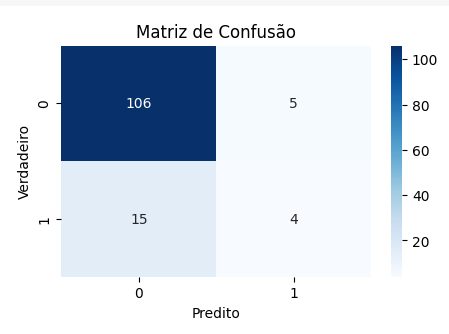
 - O modelo apresentou um score razoável para capturar os funcionários ativos, mas não conseguiu capturar bem os funcionários que serão desligados;
 - Vamos reduzir o número de instâncias da classe majoritária para verificar se há uma melhora em capturar os funcionários desligados (classe minoritária).

In [ ]:
df_rot_ml['Desligamento'].value_counts()

Desligamento
0    506
1    144
Name: count, dtype: int64

In [ ]:
# Separando as classes
class_majo = df_rot_ml[df_rot_ml.Desligamento == 0]
class_mino = df_rot_ml[df_rot_ml.Desligamento == 1]

In [ ]:
# Fazendo undersampling da classe majoritária para ter o número fixo de amostras
class_major_under = class_majo.sample(250, random_state=42)
class_major_under.shape

(250, 7)

In [ ]:
# Concatenando as classes majoritária e minoritária
df_rot_ml = pd.concat([class_major_under, class_mino], axis=0)

In [ ]:
# Embaralhando as linhas
df_rot_ml = df_rot_ml.sample(frac=1, random_state=42).reset_index(drop=True)
df_rot_ml.head()

,Pontuacao_Desempenho,Horas_Extras,Desligamento,Desempenho_Categoria,Horas_Extras_Categoria,Desempenho_Horas_Extras,Salario_Horas_Extras
0,4.939090,5.628733,0,Excelente,Poucas Horas,27.800818,710.208132
1,3.851707,2.489000,1,Bom,Poucas Horas,9.586900,1424.132989
2,1.804384,8.853359,0,Ruim,Poucas Horas,15.974860,691.861530
3,2.213011,6.128540,0,Médio,Poucas Horas,13.562527,1087.290029
4,3.942960,19.068107,1,Excelente,Horas Moderadas,75.184789,227.298470


In [ ]:
#Verificando valores únicos
df_rot_ml['Desligamento'].value_counts()

Desligamento
0    250
1    144
Name: count, dtype: int64

In [ ]:
#Instalando category_encoders no ambiente do Colab
!pip install category_encoders

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 2.0 MB/s eta 0:00:00


In [ ]:
# Importação para modelagem
#Importando a função train_test_split para divisão dos dados
from sklearn.model_selection import train_test_split

# Importanto pipeline para encadear múltiplas etapas de processamento
from sklearn.pipeline import Pipeline

#Importando a classe ColumnTransformer para realizar diferentes transformações em conjuntos de dados numéricos e categóricos
from sklearn.compose import ColumnTransformer

# Importando classes necessárias para pré-processamento
from sklearn.preprocessing import StandardScaler
from category_encoders import OneHotEncoder, TargetEncoder

# Para calcular os pesos das classes
from sklearn.utils.class_weight import compute_class_weight

#Importando estimadores
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

#Importando a classe StratifiedKFold para realizar a validação cruzada
from sklearn.model_selection import StratifiedKFold

#Seleção dos melhores parâmetros
from sklearn.model_selection import GridSearchCV

# Combina as previsões de múltiplos modelos
from sklearn.ensemble import VotingClassifier

# Avaliação do modelo de classificação
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# Separando as features (x) e a variável alvo(y)
X = df_rot_ml.drop('Desligamento', axis =1)
y = df_rot_ml['Desligamento']

In [ ]:
#Visualizando as features
X.head()

,Pontuacao_Desempenho,Horas_Extras,Desempenho_Categoria,Horas_Extras_Categoria,Desempenho_Horas_Extras,Salario_Horas_Extras
0,4.939090,5.628733,Excelente,Poucas Horas,27.800818,710.208132
1,3.851707,2.489000,Bom,Poucas Horas,9.586900,1424.132989
2,1.804384,8.853359,Ruim,Poucas Horas,15.974860,691.861530
3,2.213011,6.128540,Médio,Poucas Horas,13.562527,1087.290029
4,3.942960,19.068107,Excelente,Horas Moderadas,75.184789,227.298470


In [ ]:
#Visualizando o target
y

0      0
1      1
2      0
3      0
4      1
      ..
389    0
390    0
391    1
392    1
393    0
Name: Desligamento, Length: 394, dtype: int64

In [ ]:
# Separando em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [ ]:
# Verificando as dimensões
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(315, 6) (315,) (79, 6) (79,)


# Métrica escolhida
- Vamos utilizar como métrica de otimização o **recall**. O recall é uma métrica crucial em modelos de previsão de turnover quando o objetivo é identificar o maior número possível de funcionários propensos a sair da empresa. Isso ocorre porque o recall mede a capacidade do modelo de identificar corretamente todos os verdadeiros positivos, minimizando os falsos negativos.

# Modelos finais
- Para o notebook não ficar tão poluído, mantivemos apenas os modelos finais após todas as alterações que consideramos pertinentes no dataset.
- Vamos utilizar a codificação one-hot para as variáveis categoricas;
- One-hot encoding é útil para substituir variáveis categóricas porque evita a introdução de uma ordem arbitrária entre categorias. Ao contrário da codificação ordinal, que assume distâncias iguais entre categorias, o one-hot encoding cria colunas binárias independentes para cada categoria
- E como não sabemos se, por exemplo, a distância entre a categoria A-B é a mesma distância entre a categoria B-C, cada categoria deve ser tratada de maneira equidistante das outras, eliminando a imposição de uma ordem artificial

## KNN (4 minutos)
- **Padronização:** Vamos utilizar a padronização com o StandardScaler() porque temos variáveis numéricas com diferentes escalas. Não queremos que elas fiquem condensadas nos limites entre 0 e 1 (caso utilizássemos o MinMaxScaler), o que poderia resultar em valores concentrados no meio da distribuição. A padronização transforma os dados para que tenham média zero e desvio padrão um, preservando assim as características de dispersão dos dados originais.


In [ ]:
# Identificando colunas numéricas
numeric_features = ['Pontuacao_Desempenho', 'Horas_Extras', 'Desempenho_Horas_Extras','Salario_Horas_Extras']

# Identificando colunas categóricas
categorical_features = ['Desempenho_Categoria', 'Horas_Extras_Categoria']

# Criando um pipeline para processamento de características numéricas
numerical_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

# Criando um pipeline para processamento de características categóricas
categorical_transformer = Pipeline(steps=[
    ('encoder', OneHotEncoder())
])

# Criando um transformador de colunas com transformações apropriadas para cada tipo de dados
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
        ])

# Criando o pipeline completo com o pré-processador e o classificador
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', KNeighborsClassifier())
])

# Configuração do StratifiedKFold para a validação cruzada
SF = StratifiedKFold(n_splits=20, shuffle=True, random_state=42)

# Parâmetros para o GridSearch
param_grid= {
    'classifier__n_neighbors': range(3, 15),
    'classifier__weights': ['distance', 'uniform'],
    'classifier__algorithm': ['ball_tree', 'kd_tree', 'brute'],
    'classifier__metric': ["manhattan", "euclidean", "minkowski"],
}

# GridSearch
grid_search= GridSearchCV(pipeline, param_grid, cv=SF, scoring='recall_macro', return_train_score=True)

In [ ]:
# Executando o GridSearch
grid_search.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=20, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('scaler',
                                                                                          StandardScaler())]),
                                                                         ['Pontuacao_Desempenho',
                                                                          'Horas_Extras',
                                                                          'Desempenho_Horas_Extras',
                                                                          'Salario_Horas_Extras']),
                                                                        ('cat',
                                                                         Pipeline(steps=[('encoder',
                                                                                          OneHotEncoder())]),
                                                                         ['Desempenho_Categoria',
                                                                          'Horas_Extras_Categoria'])])),
                                       ('classifier', KNeighborsClassifier())]),
             param_grid={'classifier__algorithm': ['ball_tree', 'kd_tree',
                                                   'brute'],
                         'classifier__metric': ['manhattan', 'euclidean',
                                                'minkowski'],
                         'classifier__n_neighbors': range(3, 15),
                         'classifier__weights': ['distance', 'uniform']},
             return_train_score=True, scoring='recall_macro')

In [ ]:
# Imprimindo os melhores parâmetros e o melhor score
print(f'Melhores Parâmetros: {grid_search.best_params_}')
print(f'Melhor score de validação cruzada: {grid_search.best_score_:.3f}')

Melhores Parâmetros: {'classifier__algorithm': 'ball_tree', 'classifier__metric': 'euclidean', 'classifier__n_neighbors': 10, 'classifier__weights': 'distance'}
Melhor score de validação cruzada: 0.609


## Vamos realizar o balanceamento de classes pelo método Class Weights, este método pode ser incorporado nos estimadores SVC.

In [ ]:
#Lidando com o desbalanceamento dos dados, a classe minoritária recebe um peso maior.
class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
weights_dict = dict(zip(np.unique(y_train), class_weights))
weights_dict

{0: 0.7797029702970297, 1: 1.3938053097345133}

## SVC
- Kernel Linear
- Além do balanceamento das classes, para o Kernel Linear só temos o parâmetro de regularização C.

In [ ]:
# Identificando colunas numéricas
numeric_features = ['Pontuacao_Desempenho', 'Horas_Extras', 'Desempenho_Horas_Extras','Salario_Horas_Extras']

# Identificando colunas categóricas
categorical_features = ['Desempenho_Categoria', 'Horas_Extras_Categoria']

# Criando um pipeline para processamento de características numéricas
numerical_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

# Criando um pipeline para processamento de características categóricas com OrdinalEncoder
categorical_transformer = Pipeline(steps=[
    ('encoder', OneHotEncoder())
])

# Criando um transformador de colunas com transformações apropriadas para cada tipo de dados
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

# Criando o pipeline completo com o pré-processador e o classificador
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', SVC(class_weight=weights_dict))
])

# Configuração do StratifiedKFold para a validação cruzada
SF = StratifiedKFold(n_splits=20, shuffle=True, random_state=42)

# Parâmetros para o GridSearch
param_grid= {
    'classifier__C': [0.1, 1, 10, 100],
    'classifier__kernel': ['linear']
}

# GridSearch
grid_search= GridSearchCV(pipeline, param_grid, cv=SF, scoring='recall_macro', return_train_score=True)

In [ ]:
# Executando o GridSearch
grid_search.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=20, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('scaler',
                                                                                          StandardScaler())]),
                                                                         ['Pontuacao_Desempenho',
                                                                          'Horas_Extras',
                                                                          'Desempenho_Horas_Extras',
                                                                          'Salario_Horas_Extras']),
                                                                        ('cat',
                                                                         Pipeline(steps=[('encoder',
                                                                                          OneHotEncoder())]),
                                                                         ['Desempenho_Categoria',
                                                                          'Horas_Extras_Categoria'])])),
                                       ('classifier',
                                        SVC(class_weight={0: 0.7797029702970297,
                                                          1: 1.3938053097345133}))]),
             param_grid={'classifier__C': [0.1, 1, 10, 100],
                         'classifier__kernel': ['linear']},
             return_train_score=True, scoring='recall_macro')

In [ ]:
# Imprimindo os melhores parâmetros e o melhor score
print(f'Melhores Parâmetros: {grid_search.best_params_}')
print(f'Melhor score de validação cruzada: {grid_search.best_score_:.3f}')

Melhores Parâmetros: {'classifier__C': 1, 'classifier__kernel': 'linear'}
Melhor score de validação cruzada: 0.613


# SVC
Kernel RBF

In [ ]:
# Identificando colunas numéricas
numeric_features = ['Pontuacao_Desempenho', 'Horas_Extras', 'Desempenho_Horas_Extras','Salario_Horas_Extras']

# Identificando colunas categóricas
categorical_features = ['Desempenho_Categoria', 'Horas_Extras_Categoria']

# Criando um pipeline para processamento de características numéricas
numerical_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

# Criando um pipeline para processamento de características categóricas com OrdinalEncoder
categorical_transformer = Pipeline(steps=[
    ('encoder', OneHotEncoder())
])

# Criando um transformador de colunas com transformações apropriadas para cada tipo de dados
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

# Criando o pipeline completo com o pré-processador e o classificador
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', SVC(class_weight=weights_dict, probability=True))
])

# Configuração do StratifiedKFold para a validação cruzada
SF = StratifiedKFold(n_splits=20, shuffle=True, random_state=42)

# Parâmetros para o GridSearch
param_grid= {
    'classifier__C': [0.01, 0.1, 1, 10, 100, 1000],
    'classifier__kernel': ['rbf'],
    'classifier__gamma': [0.001, 0.01, 0.1, 1, 10]
}

# GridSearch
grid_search_svc = GridSearchCV(pipeline, param_grid, cv=SF, scoring='recall_macro', return_train_score=True)

In [ ]:
# Executando o GridSearch
grid_search_svc.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=20, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('scaler',
                                                                                          StandardScaler())]),
                                                                         ['Pontuacao_Desempenho',
                                                                          'Horas_Extras',
                                                                          'Desempenho_Horas_Extras',
                                                                          'Salario_Horas_Extras']),
                                                                        ('cat',
                                                                         Pipeline(steps=[('encoder',
                                                                                          OneHotEncoder())]),
                                                                         ['Desempenho_Categoria',
                                                                          'Horas_Extras_Categoria'])])),
                                       ('classifier',
                                        SVC(class_weight={0: 0.7797029702970297,
                                                          1: 1.3938053097345133},
                                            probability=True))]),
             param_grid={'classifier__C': [0.01, 0.1, 1, 10, 100, 1000],
                         'classifier__gamma': [0.001, 0.01, 0.1, 1, 10],
                         'classifier__kernel': ['rbf']},
             return_train_score=True, scoring='recall_macro')

In [ ]:
# Imprimindo os melhores parâmetros e o melhor score
print(f'Melhores Parâmetros: {grid_search_svc.best_params_}')
print(f'Melhor score de validação cruzada: {grid_search_svc.best_score_:.3f}')

Melhores Parâmetros: {'classifier__C': 1, 'classifier__gamma': 0.1, 'classifier__kernel': 'rbf'}
Melhor score de validação cruzada: 0.621


In [ ]:
# Fazendo previsões com o melhor modelo encontrado pelo GridSearch
y_pred_test = grid_search_svc.predict(X_test)

In [ ]:
# Calculando métricas individuais
accuracy = accuracy_score(y_test, y_pred_test)
precision = precision_score(y_test, y_pred_test, average='macro')
recall = recall_score(y_test, y_pred_test, average='macro')
f1 = f1_score(y_test, y_pred_test, average='macro')

# Imprimindo métricas
print(f'Acurácia: {accuracy:.4f}')
print(f'Precisão: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1-score: {f1:.4f}')

Acurácia: 0.6329
Precisão: 0.6290
Recall: 0.6351
F1-score: 0.6269


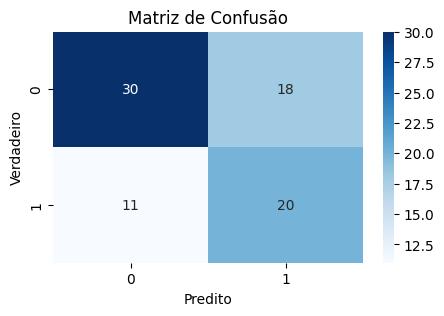

In [ ]:
#Matriz de confusão
cm = confusion_matrix(y_test, y_pred_test)

# Plotando a matriz de confusão com Seaborn
plt.figure(figsize=(5,3))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de Confusão')
plt.ylabel('Verdadeiro')
plt.xlabel('Predito')
plt.show()

- **Modelo SVC RBF:** O modelo tem uma taxa de acerto razoável para prever funcionários desligados e ativos.
---
# Xgboost
- Baseado em árvores de decisão não em distância, não é necessário escalonar.
- Também aceita hiperparâmetro de balanceamento de classes.
- One Hot Encoding não é recomendado em árvores de decisão, desta forma, vamos utilizar o Target Encoding.

In [ ]:
#Verificando valores únicos para o target
df_rot_ml['Desligamento'].value_counts()

Desligamento
0    250
1    144
Name: count, dtype: int64

In [ ]:
# Atribuindo pesos as amostras, a classe minoritária recebe um peso maior.
scale_pos_weight = weights_dict[1] / weights_dict[0]
scale_pos_weight

1.7876106194690267

In [ ]:
# Colunas sem transformação
unchanged_features = ['Pontuacao_Desempenho', 'Horas_Extras', 'Desempenho_Horas_Extras','Salario_Horas_Extras']

# Identificando colunas categóricas
categorical_features = ['Desempenho_Categoria', 'Horas_Extras_Categoria']

# Criando um pipeline para processamento de características categóricas com OrdinalEncoder
categorical_transformer = Pipeline(steps=[
    ('encoder', TargetEncoder())
])

# Criando um transformador de colunas com transformações apropriadas para cada tipo de dados
preprocessor = ColumnTransformer(
    transformers=[
        ('passthrough', 'passthrough', unchanged_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

# Criando o pipeline completo com o pré-processador e o classificador
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', XGBClassifier(eval_metric='logloss', scale_pos_weight=scale_pos_weight))
])

# Configuração do StratifiedKFold para a validação cruzada
SF = StratifiedKFold(n_splits=20, shuffle=True, random_state=42)

# Parâmetros para o GridSearch
param_grid = {
    'classifier__n_estimators': [100, 200, 300, 400, 500],
    'classifier__max_depth': [2, 3, 4, 5, 6],
    'classifier__learning_rate': [0.01, 0.02, 0.03, 0.04, 0.05],
    'classifier__subsample': [0.6, 0.7, 0.8, 0.9],
    'classifier__colsample_bytree': [0.6, 0.7, 0.8, 0.9]
}

# GridSearch
grid_search_xgb = GridSearchCV(pipeline, param_grid, cv=SF, scoring='recall_macro', return_train_score=True)

In [ ]:
# Executando o GridSearch
grid_search_xgb.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=20, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('passthrough',
                                                                         'passthrough',
                                                                         ['Pontuacao_Desempenho',
                                                                          'Horas_Extras',
                                                                          'Desempenho_Horas_Extras',
                                                                          'Salario_Horas_Extras']),
                                                                        ('cat',
                                                                         Pipeline(steps=[('encoder',
                                                                                          TargetEncoder())]),
                                                                         ['Desempenho_Categoria',
                                                                          'Horas...
                                                      n_jobs=None,
                                                      num_parallel_tree=None,
                                                      random_state=None, ...))]),
             param_grid={'classifier__colsample_bytree': [0.6, 0.7, 0.8, 0.9],
                         'classifier__learning_rate': [0.01, 0.02, 0.03, 0.04,
                                                       0.05],
                         'classifier__max_depth': [2, 3, 4, 5, 6],
                         'classifier__n_estimators': [100, 200, 300, 400, 500],
                         'classifier__subsample': [0.6, 0.7, 0.8, 0.9]},
             return_train_score=True, scoring='recall_macro')

In [ ]:
# Imprimindo os melhores parâmetros e o melhor score
print(f'Melhores Parâmetros: {grid_search_xgb.best_params_}')
print(f'Melhor score de validação cruzada: {grid_search_xgb.best_score_:.3f}')

Melhores Parâmetros: {'classifier__colsample_bytree': 0.9, 'classifier__learning_rate': 0.04, 'classifier__max_depth': 2, 'classifier__n_estimators': 100, 'classifier__subsample': 0.8}
Melhor score de validação cruzada: 0.638


In [ ]:
# Fazendo previsões com o melhor modelo encontrado pelo GridSearch
y_pred_test = grid_search_xgb.predict(X_test)

In [ ]:
# Calculando métricas individuais
accuracy = accuracy_score(y_test, y_pred_test)
precision = precision_score(y_test, y_pred_test, average='macro')
recall = recall_score(y_test, y_pred_test, average='macro')
f1 = f1_score(y_test, y_pred_test, average='macro')

# Imprimindo métricas
print(f'Acurácia: {accuracy:.4f}')
print(f'Precisão: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1-score: {f1:.4f}')

Acurácia: 0.5949
Precisão: 0.5838
Recall: 0.5867
F1-score: 0.5837


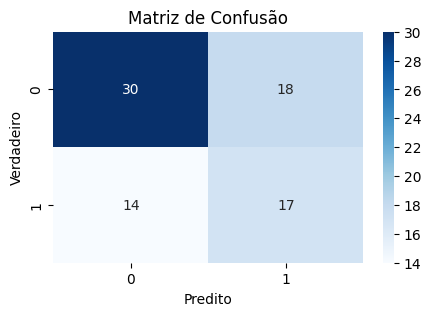

In [ ]:
#Matriz de confusão
cm = confusion_matrix(y_test, y_pred_test)

# Plotando a matriz de confusão com Seaborn
plt.figure(figsize=(5,3))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de Confusão')
plt.ylabel('Verdadeiro')
plt.xlabel('Predito')
plt.show()

### Obtenção dos Melhores Estimadores
- Vamos extrair os melhores modelos de SVM e XGBoost
- Posteriormente esses modelos vão ser combinados usando o VotingClassifier.
- Desta forma, usamos uma abordagem de ensemble que combina as forças de dois algoritmos de machine learning (SVM e XGBoost) para melhorar o desempenho da classificação através de um VotingClassifier.

In [ ]:
# Obtendo os melhores estimadores
best_svc = grid_search_svc.best_estimator_
best_xgb = grid_search_xgb.best_estimator_

In [ ]:
# Criando o VotingClassifier
voting_clf = VotingClassifier(
    estimators=[('svc', best_svc), ('xgb', best_xgb)],
    voting='soft'  # 'soft' usa as previsões de probabilidade, 'hard' usa as previsões finais
)
voting_clf

VotingClassifier(estimators=[('svc',
                              Pipeline(steps=[('preprocessor',
                                               ColumnTransformer(transformers=[('num',
                                                                                Pipeline(steps=[('scaler',
                                                                                                 StandardScaler())]),
                                                                                ['Pontuacao_Desempenho',
                                                                                 'Horas_Extras',
                                                                                 'Desempenho_Horas_Extras',
                                                                                 'Salario_Horas_Extras']),
                                                                               ('cat',
                                                                                Pipeline(steps=[('encoder',
                                                                                                 OneHotEncoder())]),
                                                                                ['Desempenho_Categoria',
                                                                                 'Horas_Extras_Categoria'])])),...
                                                             importance_type=None,
                                                             interaction_constraints=None,
                                                             learning_rate=0.04,
                                                             max_bin=None,
                                                             max_cat_threshold=None,
                                                             max_cat_to_onehot=None,
                                                             max_delta_step=None,
                                                             max_depth=2,
                                                             max_leaves=None,
                                                             min_child_weight=None,
                                                             missing=nan,
                                                             monotone_constraints=None,
                                                             multi_strategy=None,
                                                             n_estimators=100,
                                                             n_jobs=None,
                                                             num_parallel_tree=None,
                                                             random_state=None, ...))]))],
                 voting='soft')

In [ ]:
# Treinando o VotingClassifier
voting_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('svc',
                              Pipeline(steps=[('preprocessor',
                                               ColumnTransformer(transformers=[('num',
                                                                                Pipeline(steps=[('scaler',
                                                                                                 StandardScaler())]),
                                                                                ['Pontuacao_Desempenho',
                                                                                 'Horas_Extras',
                                                                                 'Desempenho_Horas_Extras',
                                                                                 'Salario_Horas_Extras']),
                                                                               ('cat',
                                                                                Pipeline(steps=[('encoder',
                                                                                                 OneHotEncoder())]),
                                                                                ['Desempenho_Categoria',
                                                                                 'Horas_Extras_Categoria'])])),...
                                                             importance_type=None,
                                                             interaction_constraints=None,
                                                             learning_rate=0.04,
                                                             max_bin=None,
                                                             max_cat_threshold=None,
                                                             max_cat_to_onehot=None,
                                                             max_delta_step=None,
                                                             max_depth=2,
                                                             max_leaves=None,
                                                             min_child_weight=None,
                                                             missing=nan,
                                                             monotone_constraints=None,
                                                             multi_strategy=None,
                                                             n_estimators=100,
                                                             n_jobs=None,
                                                             num_parallel_tree=None,
                                                             random_state=None, ...))]))],
                 voting='soft')

In [ ]:
y_pred_test = voting_clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_test)
precision = precision_score(y_test, y_pred_test, average='macro')
recall = recall_score(y_test, y_pred_test, average='macro')
f1 = f1_score(y_test, y_pred_test, average='macro')

# Imprimindo métricas
print(f'Acurácia: {accuracy:.4f}')
print(f'Precisão: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1-score: {f1:.4f}')


Acurácia: 0.6582
Precisão: 0.6371
Recall: 0.6216
F1-score: 0.6235


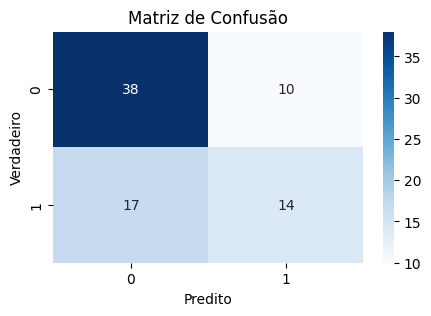

In [ ]:
#Matriz de confusão
cm = confusion_matrix(y_test, y_pred_test)

# Plotando a matriz de confusão com Seaborn
plt.figure(figsize=(5,3))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de Confusão')
plt.ylabel('Verdadeiro')
plt.xlabel('Predito')
plt.show()

In [ ]:
# Calculando as probabilidades previstas para a classe positiva
y_pred_prob = voting_clf.predict_proba(X_test)[:, 1]

In [ ]:
# Calculando a curva ROC e a AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
auc = roc_auc_score(y_test, y_pred_prob)

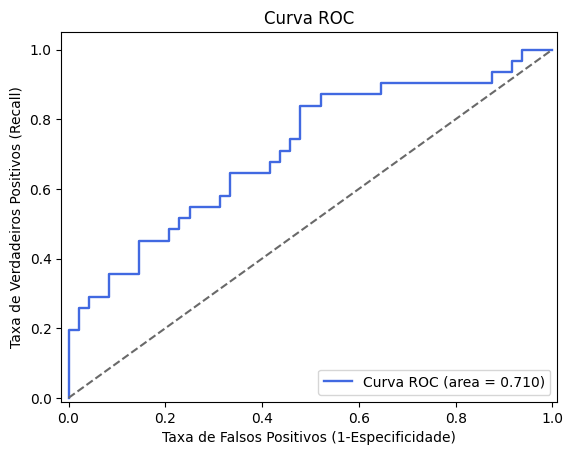

In [ ]:
# Plotando a Curva ROC
plt.figure()
plt.plot(fpr, tpr, color='#4169E1', lw=1.7, label='Curva ROC (area = %0.3f)' % auc)
plt.plot([0, 1], [0, 1], color='#696969', lw=1.5, linestyle='--')
plt.xlim([-0.015, 1.01])
plt.ylim([-0.011, 1.05])
plt.xlabel('Taxa de Falsos Positivos (1-Especificidade)')
plt.ylabel('Taxa de Verdadeiros Positivos (Recall)')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.show()


- Infelizmente, nossa tentativa de melhorar o modelo não foi eficaz.
- A acurácia de 65.82% indica que aproximadamente 65.82% das previsões do modelo estão corretas. Este é um indicador geral de quão bem o modelo está classificando tanto as classes positivas quanto as negativas.
- A precisão de 63.71% significa que, das instâncias que o modelo previu como positivas, 63.71% realmente pertencem à classe positiva.
- O recall de 62.16% indica que o modelo conseguiu identificar 62.16% de todas as instâncias positivas reais.
- O F1-Score de 62.35% é a média harmônica da precisão e do recall, proporcionando uma medida equilibrada do desempenho do modelo.
- A curva ROC mostra um aumento gradual na taxa de verdadeiros positivos à medida que a taxa de falsos positivos aumenta. Isso indica que o modelo tem uma capacidade moderada de discriminar entre as classes positiva e negativa.
- Área Sob a Curva (AUC): O valor da AUC (Area Under the Curve) é 0.710. A AUC varia de 0 a 1 e fornece uma medida agregada de desempenho em todos os possíveis limiares de classificação. Um AUC de 0.710 indica que o modelo tem uma precisão moderada.
- Em resumo, os dados sugerem que o modelo de classificação tem um desempenho razoável, mas há espaço para melhorias. Ele é melhor do que um modelo aleatório, mas ainda não é excelente.
- **Um ponto importante a destacar é que duas variáveis são um forte indicativo para que um funcionário saia da empresa: 'horas extras e 'pontuação de desempenho', olhar para estas variáveis, pode fornecer conclusões mais assertivas sobre o desligamento de um funcionário do que o modelo atual com métricas abaixo do desejado.**

# 3 - Aprendizado de máquina não supervisionado (Clusterização)
- Vamos segmentar somente os funcionários que se desligaram da empresa para entender padrões específicos neste grupo.

In [ ]:
#Visualizando os dados
df_desligados

,Data_Contratacao,Data_Desligamento,Meses_de_Servico,Idade,Pontuacao_Desempenho,Satisfacao_Trabalho,Nivel_Cargo,Salario,Horas_Extras,Desligamento,Mes_Contratacao,Intervalo
1,2023-11-16,2024-05-14,6,43,3.256257,1.711719,Sênior,8798.34,19.036627,1,11,6-9
5,2022-05-25,2024-05-14,24,43,4.328231,3.209761,Sênior,10466.00,13.933565,1,5,24-27
7,2023-08-18,2024-05-14,9,30,1.086755,1.908626,Pleno,6058.88,13.626713,1,8,9-12
12,2022-03-26,2024-05-14,26,28,2.733115,1.820046,Pleno,7252.12,6.230965,1,3,24-27
20,2022-10-22,2024-05-14,19,27,4.123725,4.465835,Pleno,7359.37,2.489000,1,10,18-21
...,...,...,...,...,...,...,...,...,...,...,...,...
634,2021-08-28,2024-05-14,33,24,3.942960,1.273013,Junior,4561.45,19.068107,1,8,33-36
639,2023-11-16,2024-05-14,6,23,3.000086,4.095554,Junior,2313.07,5.863529,1,11,6-9
640,2022-04-25,2024-05-14,25,32,4.986163,4.746069,Pleno,4353.67,0.089801,1,4,24-27
642,2022-09-22,2024-05-14,20,23,4.721714,3.340184,Pleno,4709.75,19.098905,1,9,18-21


In [ ]:
#Vamos dropar as colunas que estão com dados sintéticos, a coluna data_contratacao e intervalo
df_desligados_clus = df_desligados.drop(columns = ['Data_Desligamento', 'Data_Contratacao', 'Meses_de_Servico','Intervalo' ])
df_desligados_clus.head(10)

,Idade,Pontuacao_Desempenho,Satisfacao_Trabalho,Nivel_Cargo,Salario,Horas_Extras,Desligamento,Mes_Contratacao
1,43,3.256257,1.711719,Sênior,8798.34,19.036627,1,11
5,43,4.328231,3.209761,Sênior,10466.00,13.933565,1,5
7,30,1.086755,1.908626,Pleno,6058.88,13.626713,1,8
12,28,2.733115,1.820046,Pleno,7252.12,6.230965,1,3
20,27,4.123725,4.465835,Pleno,7359.37,2.489000,1,10
23,43,4.756251,2.832583,Sênior,11346.51,13.733500,1,2
29,31,1.386252,1.508348,Pleno,7955.66,6.222500,1,12
34,20,2.919015,3.596126,Junior,4340.52,9.956000,1,7
38,38,3.158602,3.572795,Sênior,10602.25,19.956000,1,10
42,49,4.235481,1.614330,Sênior,11917.59,22.489000,1,9


In [ ]:
#Dimensões
df_desligados_clus.shape

(144, 8)

In [ ]:
#Primeiro vamos transformar a variável Nivel_Cargo em variáveis dummy
onehotencoder = OneHotEncoder()
col_nivel_cargo_enc = onehotencoder.fit_transform(df_desligados_clus['Nivel_Cargo'])
col_nivel_cargo_enc.head(10)

,Nivel_Cargo_1,Nivel_Cargo_2,Nivel_Cargo_3
1,1,0,0
5,1,0,0
7,0,1,0
12,0,1,0
20,0,1,0
23,1,0,0
29,0,1,0
34,0,0,1
38,1,0,0
42,1,0,0


In [ ]:
#Tipo de variável
print(type(col_nivel_cargo_enc))

<class 'pandas.core.frame.DataFrame'>


In [ ]:
# Renomeando colunas
col_nivel_cargo_enc = col_nivel_cargo_enc.rename(columns={'Nivel_Cargo_1': 'Senior', 'Nivel_Cargo_2': 'Pleno', 'Nivel_Cargo_3': 'Junior'})
col_nivel_cargo_enc.head(10)

,Senior,Pleno,Junior
1,1,0,0
5,1,0,0
7,0,1,0
12,0,1,0
20,0,1,0
23,1,0,0
29,0,1,0
34,0,0,1
38,1,0,0
42,1,0,0


In [ ]:
# Juntando os DFs
df_desligados_clus = pd.concat([df_desligados_clus, col_nivel_cargo_enc], axis=1)
df_desligados_clus.head(8)

,Idade,Pontuacao_Desempenho,Satisfacao_Trabalho,Nivel_Cargo,Salario,Horas_Extras,Desligamento,Mes_Contratacao,Senior,Pleno,Junior
1,43,3.256257,1.711719,Sênior,8798.34,19.036627,1,11,1,0,0
5,43,4.328231,3.209761,Sênior,10466.00,13.933565,1,5,1,0,0
7,30,1.086755,1.908626,Pleno,6058.88,13.626713,1,8,0,1,0
12,28,2.733115,1.820046,Pleno,7252.12,6.230965,1,3,0,1,0
20,27,4.123725,4.465835,Pleno,7359.37,2.489000,1,10,0,1,0
23,43,4.756251,2.832583,Sênior,11346.51,13.733500,1,2,1,0,0
29,31,1.386252,1.508348,Pleno,7955.66,6.222500,1,12,0,1,0
34,20,2.919015,3.596126,Junior,4340.52,9.956000,1,7,0,0,1


In [ ]:
#Removendo a coluna Nivel Cargo
df_desligados_clus = df_desligados_clus.drop(['Nivel_Cargo'], axis = 1)
df_desligados_clus.head()

,Idade,Pontuacao_Desempenho,Satisfacao_Trabalho,Salario,Horas_Extras,Desligamento,Mes_Contratacao,Senior,Pleno,Junior
1,43,3.256257,1.711719,8798.34,19.036627,1,11,1,0,0
5,43,4.328231,3.209761,10466.00,13.933565,1,5,1,0,0
7,30,1.086755,1.908626,6058.88,13.626713,1,8,0,1,0
12,28,2.733115,1.820046,7252.12,6.230965,1,3,0,1,0
20,27,4.123725,4.465835,7359.37,2.489000,1,10,0,1,0


In [ ]:
# Primeiro vamos padronizar as variáveis de interesse
scaler = StandardScaler()
X_churn = scaler.fit_transform(df_desligados_clus[['Idade', 'Pontuacao_Desempenho', 'Satisfacao_Trabalho', 'Salario', 'Horas_Extras',
                                                   'Mes_Contratacao']])

In [ ]:
X_churn

array([[ 1.78305066e+00, -5.13951147e-02, -1.03079830e+00,
         9.84610656e-01,  8.71603723e-01,  1.19460053e+00],
       [ 1.78305066e+00,  8.49576150e-01,  2.84980577e-01,
         1.59285149e+00,  2.08585430e-01, -6.25743136e-01],
       [ 1.89034024e-01, -1.87481648e+00, -8.57848009e-01,
        -1.45447098e-02,  1.68717534e-01,  2.84428698e-01],
       [-5.61993045e-02, -4.91085416e-01, -9.35651288e-01,
         4.20662283e-01, -7.92179479e-01, -1.23252436e+00],
       [-1.78815969e-01,  6.77692770e-01,  1.38822998e+00,
         4.59779267e-01, -1.27835641e+00,  8.91209921e-01],
       [ 1.78305066e+00,  1.20931769e+00, -4.63074129e-02,
         1.91399737e+00,  1.82591837e-01, -1.53591497e+00],
       [ 3.11650689e-01, -1.62309585e+00, -1.20942497e+00,
         6.77262404e-01, -7.93279236e-01,  1.49799114e+00],
       [-1.03713262e+00, -3.34839905e-01,  6.24337315e-01,
        -6.41277210e-01, -3.08202063e-01, -1.89619132e-02],
       [ 1.16996734e+00, -1.33472612e-01,  6.038

In [ ]:
# Verificando a variável que também será transformada em array
col_nivel_cargo_enc.head()

,Senior,Pleno,Junior
1,1,0,0
5,1,0,0
7,0,1,0
12,0,1,0
20,0,1,0


In [ ]:
# Transformando o DataFrame em array
array_nivel_cargo_enc = col_nivel_cargo_enc.values

In [ ]:
# Concatenando os arrays linha a linha
X_churn_concatenado = np.concatenate((X_churn, array_nivel_cargo_enc), axis=1)

In [ ]:
X_churn_concatenado

array([[ 1.78305066, -0.05139511, -1.0307983 , ...,  1.        ,
         0.        ,  0.        ],
       [ 1.78305066,  0.84957615,  0.28498058, ...,  1.        ,
         0.        ,  0.        ],
       [ 0.18903402, -1.87481648, -0.85784801, ...,  0.        ,
         1.        ,  0.        ],
       ...,
       [ 0.43426735,  1.4025546 ,  1.6343684 , ...,  0.        ,
         1.        ,  0.        ],
       [-0.66928263,  1.18028998,  0.39953453, ...,  0.        ,
         1.        ,  0.        ],
       [-0.79189929,  0.2153889 ,  1.6095124 , ...,  0.        ,
         1.        ,  0.        ]])

In [ ]:
# Rodando o Kmeans
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Lista de valores de k a serem testados
k_values = range(2, 20)

# Inicializando listas para armazenar inércias e silhuetas
inertias = []
silhouette_scores = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, init = 'k-means++', n_init='auto', random_state=42)
    kmeans.fit(X_churn_concatenado)
    inertias.append(kmeans.inertia_)

    # Calcular a pontuação da silhueta
    cluster_labels = kmeans.predict(X_churn_concatenado)
    silhouette_avg = silhouette_score(X_churn_concatenado, cluster_labels)
    silhouette_scores.append(silhouette_avg)

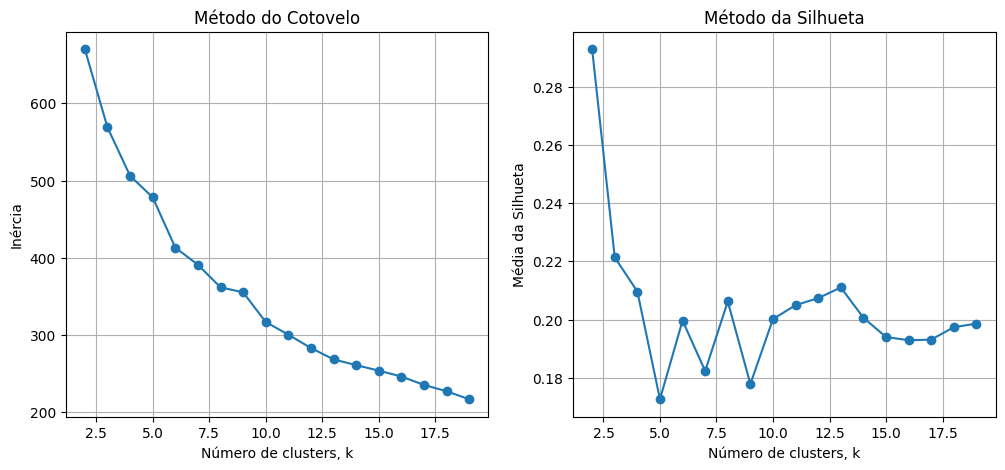

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Plotando a inércia em função de k
ax1.plot(k_values, inertias, marker='o')
ax1.set_title('Método do Cotovelo')
ax1.set_xlabel('Número de clusters, k')
ax1.set_ylabel('Inércia')
ax1.grid(True)

# Plotando o método da silhueta
ax2.plot(k_values, silhouette_scores, marker='o')
ax2.set_title('Método da Silhueta')
ax2.set_xlabel('Número de clusters, k')
ax2.set_ylabel('Média da Silhueta')
ax2.grid(True)

# Exibindo os gráficos
plt.show()


### A média máxima da silhueta está situada no cluster 2

In [ ]:
# Ajustando o modelo K-means com k=2
kmeans = KMeans(n_clusters=2, init='k-means++', n_init='auto', max_iter = 300, random_state=42 )

In [ ]:
# Prevendo os clusters
kmeans_labels = kmeans.fit_predict(X_churn_concatenado)
kmeans_labels.shape

(144,)

In [ ]:
# Calcular o Silhouette Score para KMeans
kmeans_silhouette = silhouette_score(X_churn_concatenado, kmeans_labels)
print(f'Silhouette Score para KMeans: {kmeans_silhouette:.4f}')

Silhouette Score para KMeans: 0.2928


In [ ]:
# Adicionando uma nova coluna 'cluster' ao DataFrame original com os rótulos dos clusters
df_desligados_clus['cluster'] = kmeans_labels

In [ ]:
#visualizando o DF
df_desligados_clus.head()

,Idade,Pontuacao_Desempenho,Satisfacao_Trabalho,Salario,Horas_Extras,Desligamento,Mes_Contratacao,Senior,Pleno,Junior,cluster
1,43,3.256257,1.711719,8798.34,19.036627,1,11,1,0,0,1
5,43,4.328231,3.209761,10466.00,13.933565,1,5,1,0,0,1
7,30,1.086755,1.908626,6058.88,13.626713,1,8,0,1,0,0
12,28,2.733115,1.820046,7252.12,6.230965,1,3,0,1,0,0
20,27,4.123725,4.465835,7359.37,2.489000,1,10,0,1,0,0


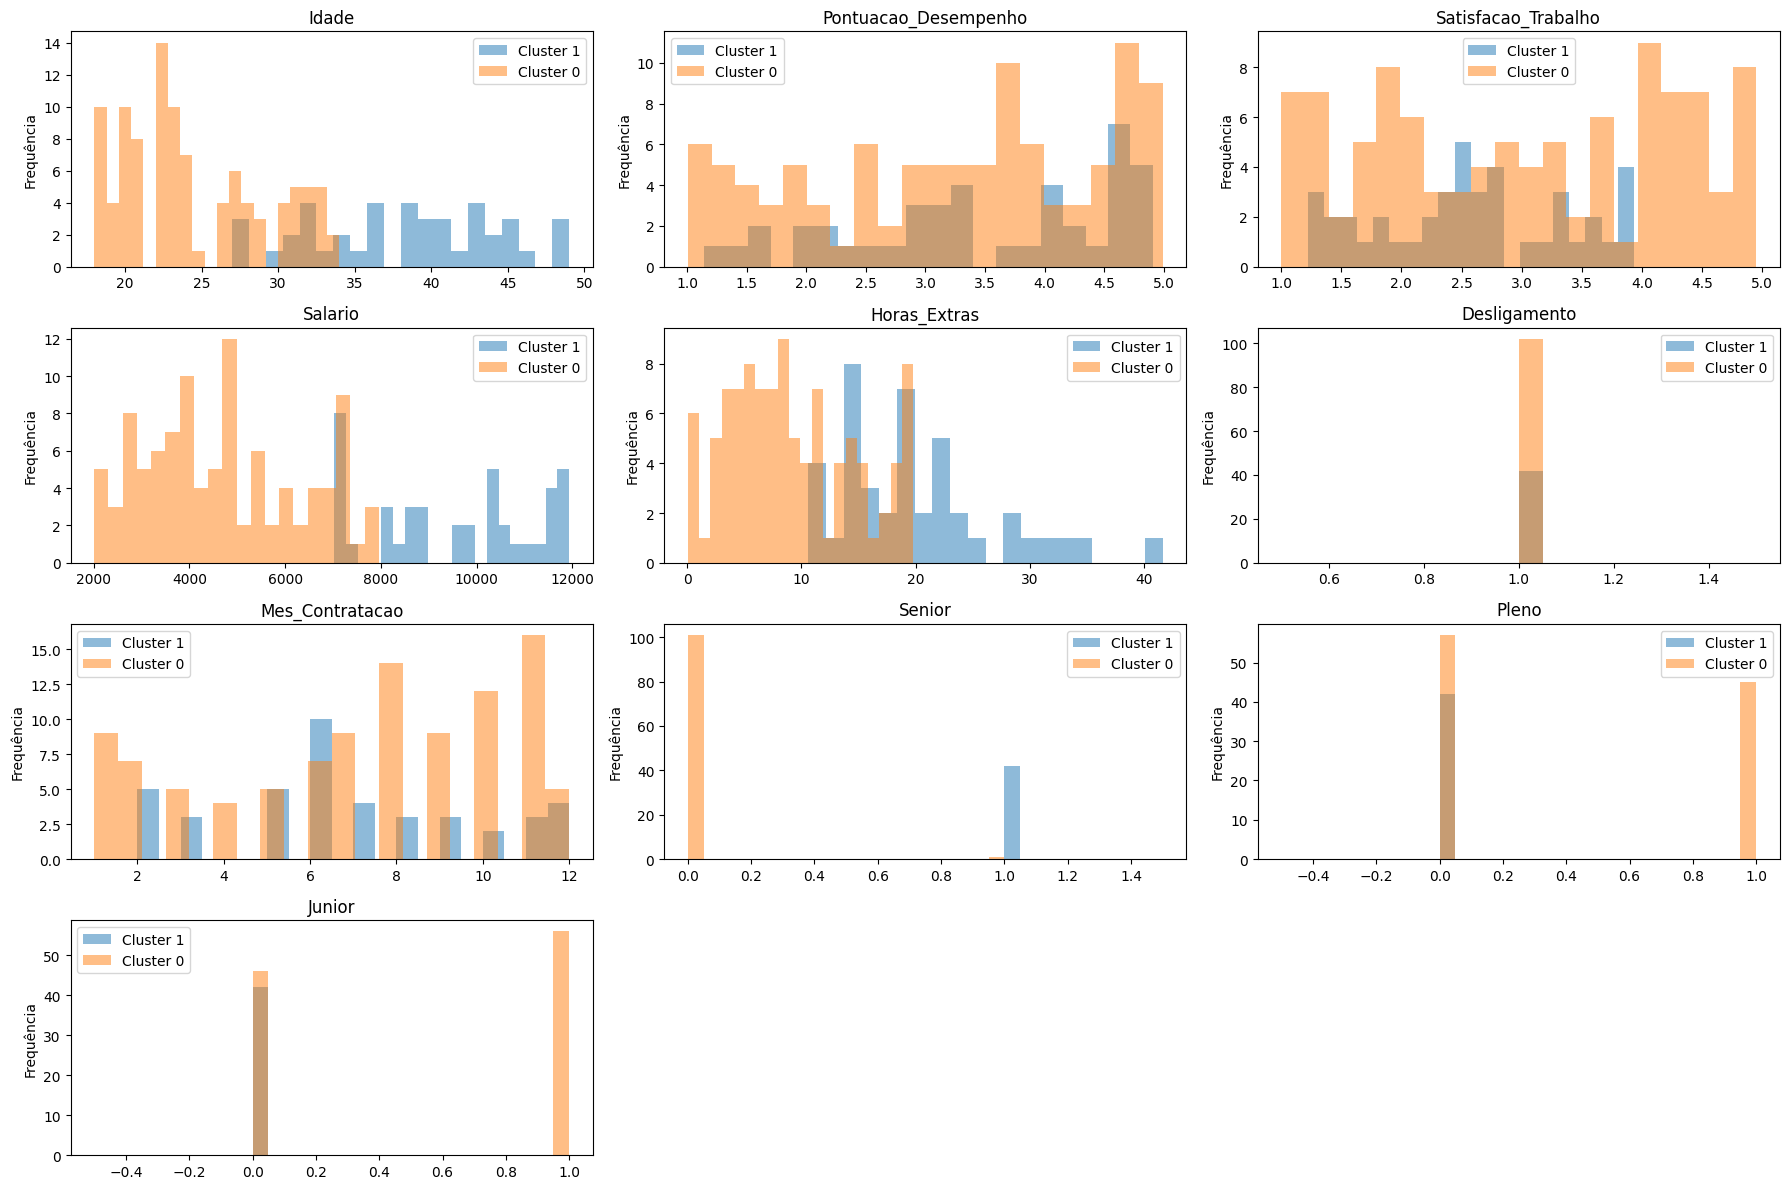

In [ ]:
# Variáveis
variables = [col for col in df_desligados_clus.columns if col != 'cluster' and 'Desligamento']

# Número de colunas e linhas para a grade de subplots
cols = 3
rows = 4
fig, axs = plt.subplots(rows, cols, figsize=(18, 12))
axs = axs.flatten()

# Plotando cada variável em um subplot
for i, var in enumerate(variables):
    for cluster in df_desligados_clus['cluster'].unique():
        subset = df_desligados_clus[df_desligados_clus['cluster'] == cluster]
        axs[i].hist(subset[var], bins=20, alpha=0.5, label=f'Cluster {cluster}')
    axs[i].set_title(var)
    axs[i].set_ylabel('Frequência')
    axs[i].legend()

# Removendo subplots vazios
for j in range(i + 1, len(axs)):
    fig.delaxes(axs[j])

plt.tight_layout()
plt.show()

In [ ]:
#Verificando valores unicos por cluster
df_desligados_clus['cluster'].value_counts()

cluster
0    102
1     42
Name: count, dtype: int64

#Análise das variáveis
## Variável Idade

In [ ]:
#Estatísticas para coluna 'idade'
df_desligados_clus.groupby('cluster')['Idade'].describe()

,count,mean,std,min,25%,50%,75%,max
cluster,,,,,,,,
0,102.0,24.392157,4.736956,18.0,21.00,23.0,28.0,34.0
1,42.0,38.333333,6.107439,27.0,33.25,39.0,43.0,49.0


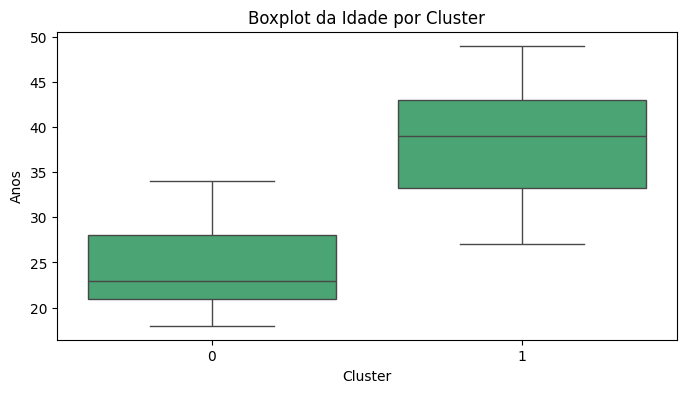

In [ ]:
plt.figure(figsize=(8, 4))
sns.boxplot(x='cluster', y='Idade', data=df_desligados_clus, color = '#3CB371')
plt.title('Boxplot da Idade por Cluster')
plt.xlabel('Cluster')
plt.ylabel('Anos')
plt.show()

- Distribuição de Idade Diferente entre Clusters: O cluster 0 possui indivíduos mais jovens (média de 24.39 anos) enquanto o cluster 1 possui indivíduos mais velhos (média de 38.33 anos).
- O desvio padrão no cluster 1 é maior (6.11 anos) comparado ao cluster 0 (4.74 anos), indicando que há mais variação nas idades dos indivíduos do cluster 1.
- A mediana é uma boa representação central das idades em ambos os clusters, com 23 anos para o cluster 0 e 39 anos para o cluster 1.

## Variável Pontuacao_Desempenho


In [ ]:
#Estatísticas para coluna 'Pontuação Desempenho
df_desligados_clus.groupby('cluster')['Pontuacao_Desempenho'].describe()

,count,mean,std,min,25%,50%,75%,max
cluster,,,,,,,,
0,102.0,3.247572,1.228049,1.004830,2.229859,3.437308,4.363569,4.992102
1,42.0,3.487007,1.102382,1.136984,2.784187,3.501711,4.538674,4.910071


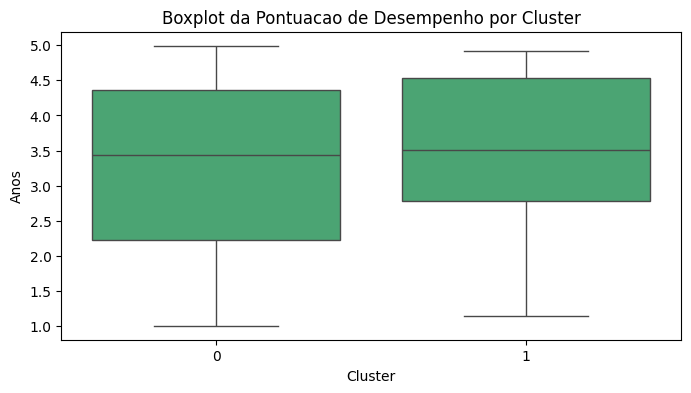

In [ ]:
plt.figure(figsize=(8, 4))
sns.boxplot(x='cluster', y='Pontuacao_Desempenho', data=df_desligados_clus, color = '#3CB371')
plt.title('Boxplot da Pontuacao de Desempenho por Cluster')
plt.xlabel('Cluster')
plt.ylabel('Anos')
plt.show()

- Distribuição de Pontuação Diferente entre Clusters: O cluster 0 possui uma média de pontuação de desempenho ligeiramente menor (3.25) em comparação com o cluster 1 (3.49).
- Variedade de Pontuação: O desvio padrão é ligeiramente maior no cluster 0 (1.23) comparado ao cluster 1 (1.10), indicando uma variação um pouco maior nas pontuações do cluster 0.
- Mediana como Representante Central: A mediana das pontuações é bastante próxima nos dois clusters, com 3.43 para o cluster 0 e 3.50 para o cluster 1, indicando que a pontuação de desempenho central é similar.

## Variável Satisfação Trabalho

In [ ]:
#Estatísticas para coluna 'Satisfacao_Trabalho'
df_desligados_clus.groupby('cluster')['Satisfacao_Trabalho'].describe()

,count,mean,std,min,25%,50%,75%,max
cluster,,,,,,,,
0,102.0,3.008752,1.240991,1.002868,1.891146,3.026496,4.143467,4.949533
1,42.0,2.585505,0.792987,1.221542,2.044469,2.541032,3.249273,3.935051


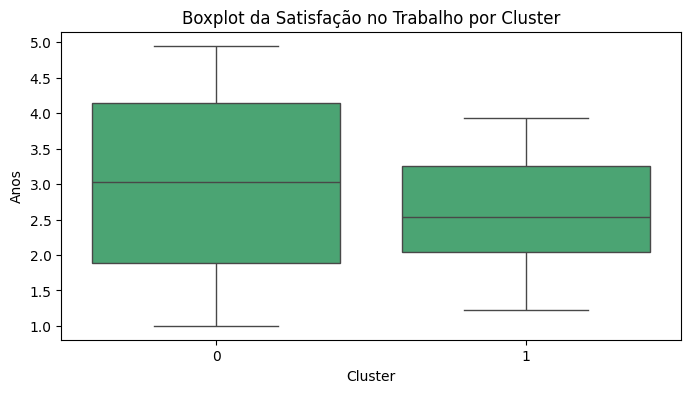

In [ ]:
plt.figure(figsize=(8, 4))
sns.boxplot(x='cluster', y='Satisfacao_Trabalho', data=df_desligados_clus, color = '#3CB371')
plt.title('Boxplot da Satisfação no Trabalho por Cluster')
plt.xlabel('Cluster')
plt.ylabel('Anos')
plt.show()

- Distribuição de Satisfação Diferente entre Clusters: O cluster 0 possui uma média de satisfação no trabalho ligeiramente maior (3.01) em comparação com o cluster 1 (2.59).
- Variedade de Satisfação: O desvio padrão é maior no cluster 0 (1.24) comparado ao cluster 1 (0.79), indicando uma variação maior na satisfação no trabalho no cluster 0.
- Mediana como Representante Central: A mediana das satisfações é maior no cluster 0 (3.03) do que no cluster 1 (2.54), sugerindo que os indivíduos no cluster 0 tendem a estar mais satisfeitos com seu trabalho.

## Variável Salário

In [ ]:
#Estatísticas para coluna 'Salário'
df_desligados_clus.groupby('cluster')['Salario'].describe()

,count,mean,std,min,25%,50%,75%,max
cluster,,,,,,,,
0,102.0,4684.130392,1615.599257,2013.19,3393.0125,4557.925,5909.0700,7955.66
1,42.0,9534.283333,1703.879386,7027.60,8165.1150,9767.560,10990.4825,11932.74


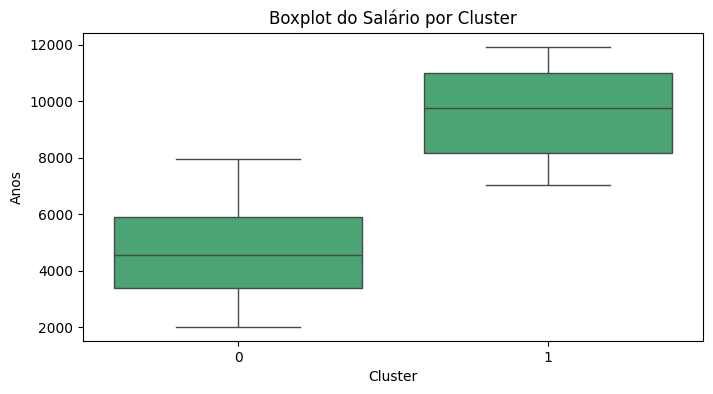

In [ ]:
plt.figure(figsize=(8, 4))
sns.boxplot(x='cluster', y='Salario', data=df_desligados_clus, color = '#3CB371')
plt.title('Boxplot do Salário por Cluster')
plt.xlabel('Cluster')
plt.ylabel('Anos')
plt.show()

- Distribuição de Salário Diferente entre Clusters: O cluster 1 possui uma média de salário significativamente maior (9534.28) em comparação com o cluster 0 (4684.13).
- Variedade de Salário: O desvio padrão é ligeiramente maior no cluster 1 (1703.88) comparado ao cluster 0 (1615.60), indicando uma variação um pouco maior nos salários do cluster 1.
- Mediana como Representante Central: A mediana dos salários é consideravelmente maior no cluster 1 (9767.56) do que no cluster 0 (4557.93), sugerindo que os indivíduos no cluster 1 tendem a ter salários mais altos.

## Variável Horas_Extras

In [ ]:
#Estatísticas para coluna 'Horas Extras'
df_desligados_clus.groupby('cluster')['Horas_Extras'].describe()

,count,mean,std,min,25%,50%,75%,max
cluster,,,,,,,,
0,102.0,9.149583,5.456720,0.055160,5.016738,8.475994,13.152816,19.782426
1,42.0,20.047503,6.966591,10.604644,14.900077,18.898464,22.811851,41.638350


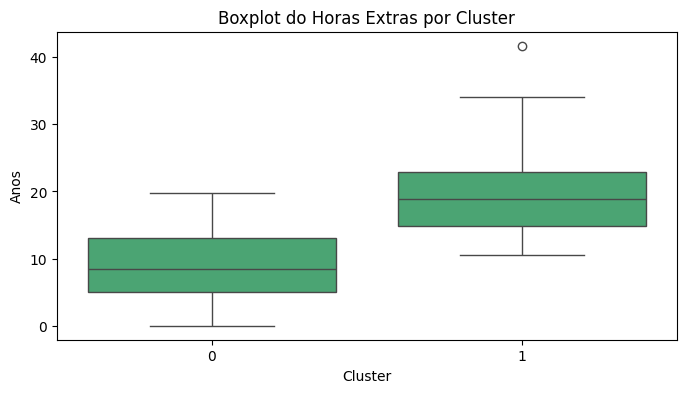

In [ ]:
plt.figure(figsize=(8, 4))
sns.boxplot(x='cluster', y='Horas_Extras', data=df_desligados_clus, color = '#3CB371')
plt.title('Boxplot do Horas Extras por Cluster')
plt.xlabel('Cluster')
plt.ylabel('Anos')
plt.show()

- Distribuição de Horas Extras Diferente entre Clusters: O cluster 1 possui uma média de horas extras significativamente maior (20.05) em comparação com o cluster 0 (9.15).
- Variedade de Horas Extras: O desvio padrão é maior no cluster 1 (6.97) comparado ao cluster 0 (5.46), indicando uma variação maior nas horas extras no cluster 1.
- Mediana como Representante Central: A mediana das horas extras é consideravelmente maior no cluster 1 (18.90) do que no cluster 0 (8.48), sugerindo que os indivíduos no cluster 1 tendem a fazer mais horas extras.

## Mês Contratação

In [ ]:
# Contagem de Mes_Contratacao por Cluster
mes_contrat = df_desligados_clus.groupby('cluster')['Mes_Contratacao'].value_counts().unstack().fillna(0)
mes_contrat

Mes_Contratacao,1,2,3,4,5,6,7,8,9,10,11,12
cluster,,,,,,,,,,,,
0,9.0,7.0,5.0,4.0,5.0,7.0,9.0,14.0,9.0,12.0,16.0,5.0
1,0.0,5.0,3.0,0.0,5.0,10.0,4.0,3.0,3.0,2.0,3.0,4.0


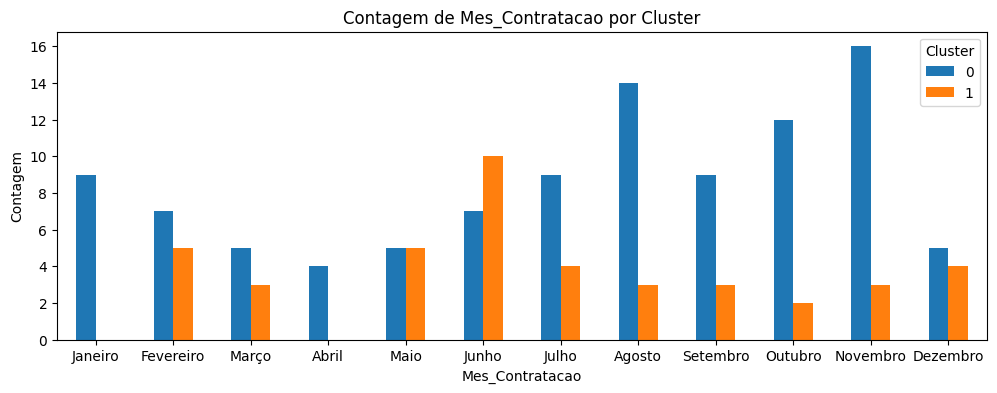

In [ ]:
# Lista com os nomes dos meses
meses = ['Janeiro', 'Fevereiro', 'Março', 'Abril', 'Maio', 'Junho',
         'Julho', 'Agosto', 'Setembro', 'Outubro', 'Novembro', 'Dezembro']

# Renomeando os índices do DataFrame transposto
mes_contrat = mes_contrat.T
mes_contrat.index = meses

# Plotando o gráfico de barras
mes_contrat.plot(kind='bar', figsize=(12, 4))

plt.title('Contagem de Mes_Contratacao por Cluster')
plt.xlabel('Mes_Contratacao')
plt.ylabel('Contagem')
plt.legend(title='Cluster')
plt.xticks(rotation=0)
plt.show()

- Cluster 0: O número de contratações varia ao longo do ano, com picos em agosto (14) e novembro (16).
- Cluster 1: As contratações também variam, mas em menor quantidade, com um pico em junho (10).

## Variáveis Nivel Cargo: Junior, Pleno e Senior



In [ ]:
# Agrupando por cluster e somando as colunas 'junior', 'pleno', 'senior'
nivel_contrat = df_desligados_clus.groupby('cluster')[['Junior', 'Pleno', 'Senior']].sum()
nivel_contrat

,Junior,Pleno,Senior
cluster,,,
0,56,45,1
1,0,0,42


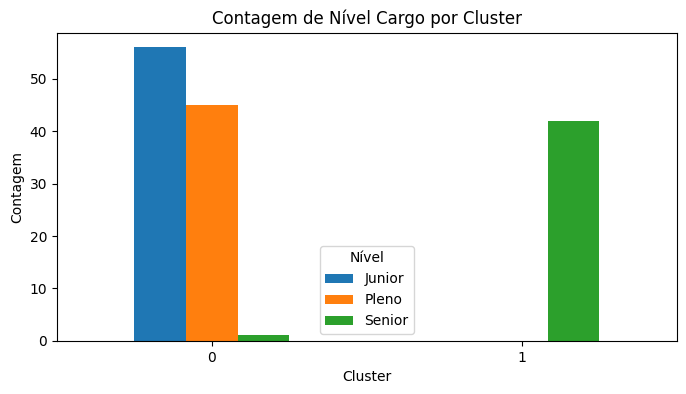

In [ ]:
# Plotando o gráfico de barras
nivel_contrat.plot(kind='bar', figsize=(8, 4))

plt.title('Contagem de Nível Cargo por Cluster')
plt.xlabel('Cluster')
plt.ylabel('Contagem')
plt.legend(title='Nível')
plt.xticks(rotation=0)
plt.show()

Distribuição de Nível de Cargo entre os Clusters:
- Cluster 0: A maioria dos indivíduos é de nível Junior (56) e Pleno (45), com apenas 1 indivíduo no nível Senior.
- Cluster 1: Todos os indivíduos são de nível Senior (42).

Comparação entre Clusters:
- Junior: Cluster 0 tem 56 indivíduos, enquanto o Cluster 1 não tem indivíduos nesse nível.
- Pleno: Cluster 0 tem 45 indivíduos, enquanto o Cluster 1 não tem indivíduos nesse nível.
- Senior: Cluster 0 tem apenas 1 indivíduo, enquanto o Cluster 1 tem 42 indivíduos.

## Conclusões finais sobre clusterização:

- Cluster 0:  Funcionários mais jovens, pontuação de desempenho ligeiramente menor, média de satisfação no trabalho ligeiramente maior, média de salário e de horas extras significativamente menor, grupo formado quase que exclusivamente por funcionários de nível de junior à pleno.

- Cluster 1: Funcionários mais velhos, pontuação de desempenho ligeiramente maior, média de satisfação no trabalho ligeiramente menor, média de salário e de horas extras significativamente maior, todos os funcionários são de nível sênior.
- Esse resumo destaca as principais diferenças entre os clusters, ajudando a entender melhor as características dos funcionários em cada grupo.

# Conclusões gerais:
- Análise do Desempenho e Horas Extras na Taxa de Desligamento: Entre as variáveis analisadas, a Pontuação de Desempenho e as Horas Extras mostraram uma relação significativa com a taxa de desligamento. Funcionários com pontuações de desempenho mais altas e aqueles que realizam mais horas extras tendem a ter uma maior probabilidade de se desligarem da empresa.
- Desempenho do Modelo de Previsão: Nosso modelo apresentou um desempenho razoável, com um recall de 62,16%, indicando que conseguiu identificar 62,16% de todas as instâncias positivas reais (funcionários propensos a sair). Isso significa que, embora o modelo ainda possa ser aprimorado, já é capaz de capturar uma parcela significativa dos funcionários que estão em risco de desligamento.
- Importância das Variáveis e Análise de Cluster: Em nossa análise de clusterização de funcionários desligados, identificamos que o Cluster 1 é composto por funcionários de nível sênior que fazem mais horas extras e recebem um salário maior. Este perfil específico pode ser um bom indicativo para prever a saída de funcionários.
